In [2]:
import ody # My function file
import numpy as np
from matplotlib import pyplot as plt
import time
from tqdm import tqdm
import seaborn as sns
from numba import njit
from tabulate import tabulate
import copy

EXPERIMENT_STARTING_TIME = time.time()

In [3]:
"""
Function to Plot the journey of the TSP
map         :(n,3) np.array of the coordinates of the city and the ID of the city at the end
sequence    :(n) np.array with the sequence that the TSP will visit the cities.
                Element (0) of the array will be the first (provided) city which the TSP starts.
"""
def plot_journey(map, sequence, name, rate=0.05, inline=True):
    oc = ordered_cities(sequence, map)

    ax = ody.plot()
    ax.axis('equal')
    ax.set_title("Initial Solution to Map: " + name)
    ax.scatter(map[:,0], map[:,1])
    plt.xlabel('X Coordinates')   ;   plt.ylabel('Y Coordinates')
    for v in range(1, len(sequence)+1):
        ax.plot(oc[:v,0], oc[:v,1], 'r')
        if not inline:
            plt.pause(rate)
            plt.show()
    ax.scatter(oc[0,0], oc[0,1],s=80, color='g')
    if inline: plt.show()

def plot_map(map, name):
    ax = ody.plot()
    ax.axis('equal')
    ax.set_title("Map: " + name)
    ax.scatter(map[:,0], map[:,1], s=40, edgecolors='tab:blue') # ,  facecolors='none'
    plt.xlabel('X Coordinates')   ;   plt.ylabel('Y Coordinates')

    plt.savefig("Map  - " + name + ".png")
    plt.show()

"""Function to order cities based on a given sequence. Must use the (n,3) format for map
Returns:
    map:   ordered based on sequence"""
def ordered_cities(sequence, map):
    r = []
    for i3 in sequence: r.append(map[i3-1, :])
    return np.array(r)

# Maps that will be used for the TSP problem.

 - - EI51 - - 


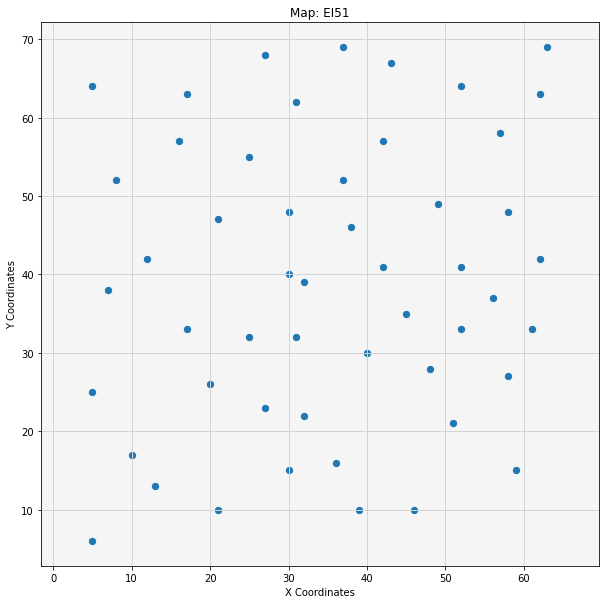

Length of EI51 = 51 
Known Solution = 426
Bottom Left City of EI51 = 40

 - - A280 - - 


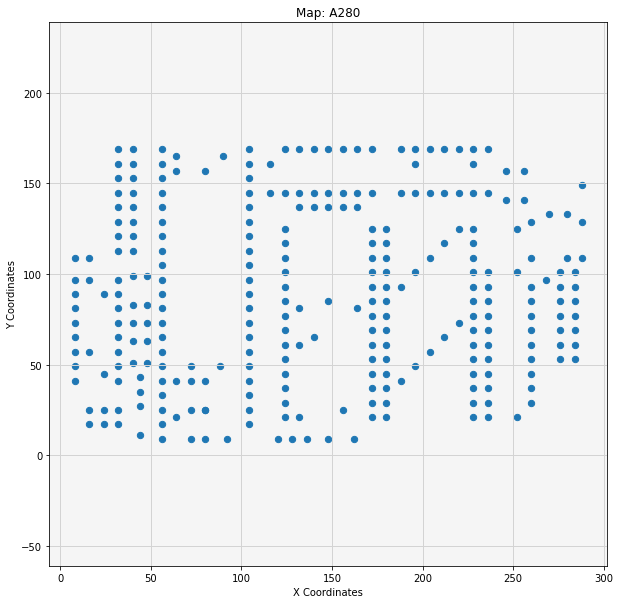

Length of A280 = 280 
Known Solution = 2579
Bottom Left City of A280 = 96

 - - PCB442 - - 


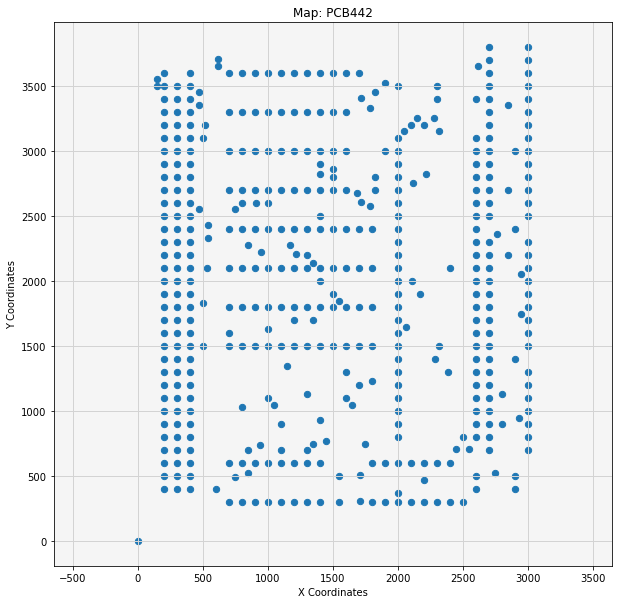

Length of PCB442 = 442 
Known Solution = 50778

Bottom Left City of PCB442 = 442



In [4]:
%matplotlib inline

dtype = int #;   print(f"Data type of np.arrays = {dtype}")
print(" - - EI51 - - ")
EI51 = [[37, 52, 1], [49, 49, 2], [52, 64, 3], [20, 26, 4], [40, 30, 5], [21, 47, 6], [17, 63, 7], [31, 62, 8], [52, 33, 9], [51, 21, 10], [42, 41, 11], [31, 32, 12], [5, 25, 13], [12, 42, 14], [36, 16, 15], [52, 41, 16], [27, 23, 17], [17, 33, 18], [13, 13, 19], [57, 58, 20], [62, 42, 21], [42, 57, 22], [16, 57, 23], [8, 52, 24], [7, 38, 25], [27, 68, 26], [30, 48, 27], [43, 67, 28], [58, 48, 29], [58, 27, 30], [37, 69, 31], [38, 46, 32], [46, 10, 33], [61, 33, 34], [62, 63, 35], [63, 69, 36], [32, 22, 37], [45, 35, 38], [59, 15, 39], [5, 6, 40], [10, 17, 41], [21, 10, 42], [5, 64, 43], [30, 15, 44], [39, 10, 45], [32, 39, 46], [25, 32, 47], [25, 55, 48], [48, 28, 49], [56, 37, 50], [30, 40, 51]]
# EI51 = [[37, 52], [49, 49], [52, 64], [20, 26], [40, 30], [21, 47], [17, 63], [31, 62], [52, 33], [51, 21], [42, 41], [31, 32], [5, 25], [12, 42], [36, 16], [52, 41], [27, 23], [17, 33], [13, 13], [57, 58], [62, 42], [42, 57], [16, 57], [8, 52], [7, 38], [27, 68], [30, 48], [43, 67], [58, 48], [58, 27], [37, 69], [38, 46], [46, 10], [61, 33], [62, 63], [63, 69], [32, 22], [45, 35], [59, 15], [5, 6], [10, 17], [21, 10], [5, 64], [30, 15], [39, 10], [32, 39], [25, 32], [25, 55], [48, 28], [56, 37], [30, 40]]
SOLUTION_EI51 = 426
EI51 = np.array(EI51, dtype=dtype)
plot_map(EI51, "EI51")
print(f"Length of EI51 = {len(EI51)} \nKnown Solution = {SOLUTION_EI51}")
print(f"Bottom Left City of EI51 = {EI51[ np.argmin(EI51[:,0] + EI51[:,1]) ][2]}\n")

print(" - - A280 - - ")
A280 = [[288, 149, 1], [288, 129, 2], [270, 133, 3], [256, 141, 4], [256, 157, 5], [246, 157, 6], [236, 169, 7], [228, 169, 8], [228, 161, 9], [220, 169, 10], [212, 169, 11], [204, 169, 12], [196, 169, 13], [188, 169, 14], [196, 161, 15], [188, 145, 16], [172, 145, 17], [164, 145, 18], [156, 145, 19], [148, 145, 20], [140, 145, 21], [148, 169, 22], [164, 169, 23], [172, 169, 24], [156, 169, 25], [140, 169, 26], [132, 169, 27], [124, 169, 28], [116, 161, 29], [104, 153, 30], [104, 161, 31], [104, 169, 32], [90, 165, 33], [80, 157, 34], [64, 157, 35], [64, 165, 36], [56, 169, 37], [56, 161, 38], [56, 153, 39], [56, 145, 40], [56, 137, 41], [56, 129, 42], [56, 121, 43], [40, 121, 44], [40, 129, 45], [40, 137, 46], [40, 145, 47], [40, 153, 48], [40, 161, 49], [40, 169, 50], [32, 169, 51], [32, 161, 52], [32, 153, 53], [32, 145, 54], [32, 137, 55], [32, 129, 56], [32, 121, 57], [32, 113, 58], [40, 113, 59], [56, 113, 60], [56, 105, 61], [48, 99, 62], [40, 99, 63], [32, 97, 64], [32, 89, 65], [24, 89, 66], [16, 97, 67], [16, 109, 68], [8, 109, 69], [8, 97, 70], [8, 89, 71], [8, 81, 72], [8, 73, 73], [8, 65, 74], [8, 57, 75], [16, 57, 76], [8, 49, 77], [8, 41, 78], [24, 45, 79], [32, 41, 80], [32, 49, 81], [32, 57, 82], [32, 65, 83], [32, 73, 84], [32, 81, 85], [40, 83, 86], [40, 73, 87], [40, 63, 88], [40, 51, 89], [44, 43, 90], [44, 35, 91], [44, 27, 92], [32, 25, 93], [24, 25, 94], [16, 25, 95], [16, 17, 96], [24, 17, 97], [32, 17, 98], [44, 11, 99], [56, 9, 100], [56, 17, 101], [56, 25, 102], [56, 33, 103], [56, 41, 104], [64, 41, 105], [72, 41, 106], [72, 49, 107], [56, 49, 108], [48, 51, 109], [56, 57, 110], [56, 65, 111], [48, 63, 112], [48, 73, 113], [56, 73, 114], [56, 81, 115], [48, 83, 116], [56, 89, 117], [56, 97, 118], [104, 97, 119], [104, 105, 120], [104, 113, 121], [104, 121, 122], [104, 129, 123], [104, 137, 124], [104, 145, 125], [116, 145, 126], [124, 145, 127], [132, 145, 128], [132, 137, 129], [140, 137, 130], [148, 137, 131], [156, 137, 132], [164, 137, 133], [172, 125, 134], [172, 117, 135], [172, 109, 136], [172, 101, 137], [172, 93, 138], [172, 85, 139], [180, 85, 140], [180, 77, 141], [180, 69, 142], [180, 61, 143], [180, 53, 144], [172, 53, 145], [172, 61, 146], [172, 69, 147], [172, 77, 148], [164, 81, 149], [148, 85, 150], [124, 85, 151], [124, 93, 152], [124, 109, 153], [124, 125, 154], [124, 117, 155], [124, 101, 156], [104, 89, 157], [104, 81, 158], [104, 73, 159], [104, 65, 160], [104, 49, 161], [104, 41, 162], [104, 33, 163], [104, 25, 164], [104, 17, 165], [92, 9, 166], [80, 9, 167], [72, 9, 168], [64, 21, 169], [72, 25, 170], [80, 25, 171], [80, 25, 172], [80, 41, 173], [88, 49, 174], [104, 57, 175], [124, 69, 176], [124, 77, 177], [132, 81, 178], [140, 65, 179], [132, 61, 180], [124, 61, 181], [124, 53, 182], [124, 45, 183], [124, 37, 184], [124, 29, 185], [132, 21, 186], [124, 21, 187], [120, 9, 188], [128, 9, 189], [136, 9, 190], [148, 9, 191], [162, 9, 192], [156, 25, 193], [172, 21, 194], [180, 21, 195], [180, 29, 196], [172, 29, 197], [172, 37, 198], [172, 45, 199], [180, 45, 200], [180, 37, 201], [188, 41, 202], [196, 49, 203], [204, 57, 204], [212, 65, 205], [220, 73, 206], [228, 69, 207], [228, 77, 208], [236, 77, 209], [236, 69, 210], [236, 61, 211], [228, 61, 212], [228, 53, 213], [236, 53, 214], [236, 45, 215], [228, 45, 216], [228, 37, 217], [236, 37, 218], [236, 29, 219], [228, 29, 220], [228, 21, 221], [236, 21, 222], [252, 21, 223], [260, 29, 224], [260, 37, 225], [260, 45, 226], [260, 53, 227], [260, 61, 228], [260, 69, 229], [260, 77, 230], [276, 77, 231], [276, 69, 232], [276, 61, 233], [276, 53, 234], [284, 53, 235], [284, 61, 236], [284, 69, 237], [284, 77, 238], [284, 85, 239], [284, 93, 240], [284, 101, 241], [288, 109, 242], [280, 109, 243], [276, 101, 244], [276, 93, 245], [276, 85, 246], [268, 97, 247], [260, 109, 248], [252, 101, 249], [260, 93, 250], [260, 85, 251], [236, 85, 252], [228, 85, 253], [228, 93, 254], [236, 93, 255], [236, 101, 256], [228, 101, 257], [228, 109, 258], [228, 117, 259], [228, 125, 260], [220, 125, 261], [212, 117, 262], [204, 109, 263], [196, 101, 264], [188, 93, 265], [180, 93, 266], [180, 101, 267], [180, 109, 268], [180, 117, 269], [180, 125, 270], [196, 145, 271], [204, 145, 272], [212, 145, 273], [220, 145, 274], [228, 145, 275], [236, 145, 276], [246, 141, 277], [252, 125, 278], [260, 129, 279], [280, 133, 280]]
# A280 = [[288, 149], [288, 129], [270, 133], [256, 141], [256, 157], [246, 157], [236, 169], [228, 169], [228, 161], [220, 169], [212, 169], [204, 169], [196, 169], [188, 169], [196, 161], [188, 145], [172, 145], [164, 145], [156, 145], [148, 145], [140, 145], [148, 169], [164, 169], [172, 169], [156, 169], [140, 169], [132, 169], [124, 169], [116, 161], [104, 153], [104, 161], [104, 169], [90, 165], [80, 157], [64, 157], [64, 165], [56, 169], [56, 161], [56, 153], [56, 145], [56, 137], [56, 129], [56, 121], [40, 121], [40, 129], [40, 137], [40, 145], [40, 153], [40, 161], [40, 169], [32, 169], [32, 161], [32, 153], [32, 145], [32, 137], [32, 129], [32, 121], [32, 113], [40, 113], [56, 113], [56, 105], [48, 99], [40, 99], [32, 97], [32, 89], [24, 89], [16, 97], [16, 109], [8, 109], [8, 97], [8, 89], [8, 81], [8, 73], [8, 65], [8, 57], [16, 57], [8, 49], [8, 41], [24, 45], [32, 41], [32, 49], [32, 57], [32, 65], [32, 73], [32, 81], [40, 83], [40, 73], [40, 63], [40, 51], [44, 43], [44, 35], [44, 27], [32, 25], [24, 25], [16, 25], [16, 17], [24, 17], [32, 17], [44, 11], [56, 9], [56, 17], [56, 25], [56, 33], [56, 41], [64, 41], [72, 41], [72, 49], [56, 49], [48, 51], [56, 57], [56, 65], [48, 63], [48, 73], [56, 73], [56, 81], [48, 83], [56, 89], [56, 97], [104, 97], [104, 105], [104, 113], [104, 121], [104, 129], [104, 137], [104, 145], [116, 145], [124, 145], [132, 145], [132, 137], [140, 137], [148, 137], [156, 137], [164, 137], [172, 125], [172, 117], [172, 109], [172, 101], [172, 93], [172, 85], [180, 85], [180, 77], [180, 69], [180, 61], [180, 53], [172, 53], [172, 61], [172, 69], [172, 77], [164, 81], [148, 85], [124, 85], [124, 93], [124, 109], [124, 125], [124, 117], [124, 101], [104, 89], [104, 81], [104, 73], [104, 65], [104, 49], [104, 41], [104, 33], [104, 25], [104, 17], [92, 9], [80, 9], [72, 9], [64, 21], [72, 25], [80, 25], [80, 25], [80, 41], [88, 49], [104, 57], [124, 69], [124, 77], [132, 81], [140, 65], [132, 61], [124, 61], [124, 53], [124, 45], [124, 37], [124, 29], [132, 21], [124, 21], [120, 9], [128, 9], [136, 9], [148, 9], [162, 9], [156, 25], [172, 21], [180, 21], [180, 29], [172, 29], [172, 37], [172, 45], [180, 45], [180, 37], [188, 41], [196, 49], [204, 57], [212, 65], [220, 73], [228, 69], [228, 77], [236, 77], [236, 69], [236, 61], [228, 61], [228, 53], [236, 53], [236, 45], [228, 45], [228, 37], [236, 37], [236, 29], [228, 29], [228, 21], [236, 21], [252, 21], [260, 29], [260, 37], [260, 45], [260, 53], [260, 61], [260, 69], [260, 77], [276, 77], [276, 69], [276, 61], [276, 53], [284, 53], [284, 61], [284, 69], [284, 77], [284, 85], [284, 93], [284, 101], [288, 109], [280, 109], [276, 101], [276, 93], [276, 85], [268, 97], [260, 109], [252, 101], [260, 93], [260, 85], [236, 85], [228, 85], [228, 93], [236, 93], [236, 101], [228, 101], [228, 109], [228, 117], [228, 125], [220, 125], [212, 117], [204, 109], [196, 101], [188, 93], [180, 93], [180, 101], [180, 109], [180, 117], [180, 125], [196, 145], [204, 145], [212, 145], [220, 145], [228, 145], [236, 145], [246, 141], [252, 125], [260, 129], [280, 133]]
SOLUTION_A280 = 2579
A280 = np.array(A280, dtype=dtype)
plot_map(A280, "A280")
print(f"Length of A280 = {len(A280)} \nKnown Solution = {SOLUTION_A280}")
print(f"Bottom Left City of A280 = {A280[ np.argmin(A280[:,0] + A280[:,1]) ][2]}\n")

print(" - - PCB442 - - ")
PCB442 = [[200, 400, 1], [200, 500, 2], [200, 600, 3], [200, 700, 4], [200, 800, 5], [200, 900, 6], [200, 1000, 7], [200, 1100, 8], [200, 1200, 9], [200, 1300, 10], [200, 1400, 11], [200, 1500, 12], [200, 1600, 13], [200, 1700, 14], [200, 1800, 15], [200, 1900, 16], [200, 2000, 17], [200, 2100, 18], [200, 2200, 19], [200, 2300, 20], [200, 2400, 21], [200, 2500, 22], [200, 2600, 23], [200, 2700, 24], [200, 2800, 25], [200, 2900, 26], [200, 3000, 27], [200, 3100, 28], [200, 3200, 29], [200, 3300, 30], [200, 3400, 31], [200, 3500, 32], [200, 3600, 33], [300, 400, 34], [300, 500, 35], [300, 600, 36], [300, 700, 37], [300, 800, 38], [300, 900, 39], [300, 1000, 40], [300, 1100, 41], [300, 1200, 42], [300, 1300, 43], [300, 1400, 44], [300, 1500, 45], [300, 1600, 46], [300, 1700, 47], [300, 1800, 48], [300, 1900, 49], [300, 2000, 50], [300, 2100, 51], [300, 2200, 52], [300, 2300, 53], [300, 2400, 54], [300, 2500, 55], [300, 2600, 56], [300, 2700, 57], [300, 2800, 58], [300, 2900, 59], [300, 3000, 60], [300, 3100, 61], [300, 3200, 62], [300, 3300, 63], [300, 3400, 64], [300, 3500, 65], [400, 400, 66], [400, 500, 67], [400, 600, 68], [400, 700, 69], [400, 800, 70], [400, 900, 71], [400, 1000, 72], [400, 1100, 73], [400, 1200, 74], [400, 1300, 75], [400, 1400, 76], [400, 1500, 77], [400, 1600, 78], [400, 1700, 79], [400, 1800, 80], [400, 1900, 81], [400, 2000, 82], [400, 2100, 83], [400, 2200, 84], [400, 2300, 85], [400, 2400, 86], [400, 2500, 87], [400, 2600, 88], [400, 2700, 89], [400, 2800, 90], [400, 2900, 91], [400, 3000, 92], [400, 3100, 93], [400, 3200, 94], [400, 3300, 95], [400, 3400, 96], [400, 3500, 97], [400, 3600, 98], [500, 1500, 99], [500, 1829, 100], [500, 3100, 101], [600, 400, 102], [700, 300, 103], [700, 600, 104], [700, 1500, 105], [700, 1600, 106], [700, 1800, 107], [700, 2100, 108], [700, 2400, 109], [700, 2700, 110], [700, 3000, 111], [700, 3300, 112], [700, 3600, 113], [800, 300, 114], [800, 600, 115], [800, 1030, 116], [800, 1500, 117], [800, 1800, 118], [800, 2100, 119], [800, 2400, 120], [800, 2600, 121], [800, 2700, 122], [800, 3000, 123], [800, 3300, 124], [800, 3600, 125], [900, 300, 126], [900, 600, 127], [900, 1500, 128], [900, 1800, 129], [900, 2100, 130], [900, 2400, 131], [900, 2700, 132], [900, 3000, 133], [900, 3300, 134], [900, 3600, 135], [1000, 300, 136], [1000, 600, 137], [1000, 1100, 138], [1000, 1500, 139], [1000, 1629, 140], [1000, 1800, 141], [1000, 2100, 142], [1000, 2400, 143], [1000, 2600, 144], [1000, 2700, 145], [1000, 3000, 146], [1000, 3300, 147], [1000, 3600, 148], [1100, 300, 149], [1100, 600, 150], [1100, 700, 151], [1100, 900, 152], [1100, 1500, 153], [1100, 1800, 154], [1100, 2100, 155], [1100, 2400, 156], [1100, 2700, 157], [1100, 3000, 158], [1100, 3300, 159], [1100, 3600, 160], [1200, 300, 161], [1200, 600, 162], [1200, 1500, 163], [1200, 1700, 164], [1200, 1800, 165], [1200, 2100, 166], [1200, 2400, 167], [1200, 2700, 168], [1200, 3000, 169], [1200, 3300, 170], [1200, 3600, 171], [1300, 300, 172], [1300, 600, 173], [1300, 700, 174], [1300, 1130, 175], [1300, 1500, 176], [1300, 1800, 177], [1300, 2100, 178], [1300, 2200, 179], [1300, 2400, 180], [1300, 2700, 181], [1300, 3000, 182], [1300, 3300, 183], [1300, 3600, 184], [1400, 300, 185], [1400, 600, 186], [1400, 930, 187], [1400, 1500, 188], [1400, 1800, 189], [1400, 2000, 190], [1400, 2100, 191], [1400, 2400, 192], [1400, 2500, 193], [1400, 2700, 194], [1400, 2820, 195], [1400, 2900, 196], [1400, 3000, 197], [1400, 3300, 198], [1400, 3600, 199], [1500, 1500, 200], [1500, 1800, 201], [1500, 1900, 202], [1500, 2100, 203], [1500, 2400, 204], [1500, 2700, 205], [1500, 2800, 206], [1500, 2860, 207], [1500, 3000, 208], [1500, 3300, 209], [1500, 3600, 210], [1600, 1100, 211], [1600, 1300, 212], [1600, 1500, 213], [1600, 1800, 214], [1600, 2100, 215], [1600, 2400, 216], [1600, 2700, 217], [1600, 3000, 218], [1600, 3300, 219], [1600, 3600, 220], [1700, 1200, 221], [1700, 1500, 222], [1700, 1800, 223], [1700, 2100, 224], [1700, 2400, 225], [1700, 3600, 226], [1800, 300, 227], [1800, 600, 228], [1800, 1230, 229], [1800, 1500, 230], [1800, 1800, 231], [1800, 2100, 232], [1800, 2400, 233], [1900, 300, 234], [1900, 600, 235], [1900, 3000, 236], [1900, 3520, 237], [2000, 300, 238], [2000, 370, 239], [2000, 600, 240], [2000, 800, 241], [2000, 900, 242], [2000, 1000, 243], [2000, 1100, 244], [2000, 1200, 245], [2000, 1300, 246], [2000, 1400, 247], [2000, 1500, 248], [2000, 1600, 249], [2000, 1700, 250], [2000, 1800, 251], [2000, 1900, 252], [2000, 2000, 253], [2000, 2100, 254], [2000, 2200, 255], [2000, 2300, 256], [2000, 2400, 257], [2000, 2500, 258], [2000, 2600, 259], [2000, 2700, 260], [2000, 2800, 261], [2000, 2900, 262], [2000, 3000, 263], [2000, 3100, 264], [2000, 3500, 265], [2100, 300, 266], [2100, 600, 267], [2100, 3200, 268], [2200, 300, 269], [2200, 469, 270], [2200, 600, 271], [2200, 3200, 272], [2300, 300, 273], [2300, 600, 274], [2300, 3400, 275], [2400, 300, 276], [2400, 600, 277], [2400, 2100, 278], [2500, 300, 279], [2500, 800, 280], [2600, 400, 281], [2600, 500, 282], [2600, 800, 283], [2600, 900, 284], [2600, 1000, 285], [2600, 1100, 286], [2600, 1200, 287], [2600, 1300, 288], [2600, 1400, 289], [2600, 1500, 290], [2600, 1600, 291], [2600, 1700, 292], [2600, 1800, 293], [2600, 1900, 294], [2600, 2000, 295], [2600, 2100, 296], [2600, 2200, 297], [2600, 2300, 298], [2600, 2400, 299], [2600, 2500, 300], [2600, 2600, 301], [2600, 2700, 302], [2600, 2800, 303], [2600, 2900, 304], [2600, 3000, 305], [2600, 3100, 306], [2600, 3400, 307], [2700, 700, 308], [2700, 800, 309], [2700, 900, 310], [2700, 1000, 311], [2700, 1100, 312], [2700, 1200, 313], [2700, 1300, 314], [2700, 1400, 315], [2700, 1500, 316], [2700, 1600, 317], [2700, 1700, 318], [2700, 1800, 319], [2700, 1900, 320], [2700, 2000, 321], [2700, 2100, 322], [2700, 2200, 323], [2700, 2300, 324], [2700, 2500, 325], [2700, 2600, 326], [2700, 2700, 327], [2700, 2800, 328], [2700, 2900, 329], [2700, 3000, 330], [2700, 3100, 331], [2700, 3200, 332], [2700, 3300, 333], [2700, 3400, 334], [2700, 3500, 335], [2700, 3600, 336], [2700, 3700, 337], [2700, 3800, 338], [2800, 900, 339], [2800, 1130, 340], [2900, 400, 341], [2900, 500, 342], [2900, 1400, 343], [2900, 2400, 344], [2900, 3000, 345], [3000, 700, 346], [3000, 800, 347], [3000, 900, 348], [3000, 1000, 349], [3000, 1100, 350], [3000, 1200, 351], [3000, 1300, 352], [3000, 1500, 353], [3000, 1600, 354], [3000, 1700, 355], [3000, 1800, 356], [3000, 1900, 357], [3000, 2000, 358], [3000, 2100, 359], [3000, 2200, 360], [3000, 2300, 361], [3000, 2500, 362], [3000, 2600, 363], [3000, 2700, 364], [3000, 2800, 365], [3000, 2900, 366], [3000, 3000, 367], [3000, 3100, 368], [3000, 3200, 369], [3000, 3300, 370], [3000, 3400, 371], [3000, 3500, 372], [3000, 3600, 373], [3000, 3700, 374], [3000, 3800, 375], [150, 3500, 376], [150, 3550, 377], [469, 2550, 378], [469, 3350, 379], [469, 3450, 380], [540, 2330, 381], [540, 2430, 382], [620, 3650, 383], [620, 3709, 384], [750, 2550, 385], [850, 520, 386], [850, 700, 387], [850, 2280, 388], [939, 740, 389], [950, 2220, 390], [910, 2600, 391], [1050, 1050, 392], [1150, 1350, 393], [1170, 2280, 394], [1220, 2210, 395], [1350, 750, 396], [1350, 1700, 397], [1350, 2140, 398], [1450, 770, 399], [1550, 300, 400], [1550, 500, 401], [1550, 1850, 402], [1650, 1050, 403], [1690, 2680, 404], [1710, 310, 405], [1710, 510, 406], [1750, 750, 407], [1790, 2580, 408], [1720, 2610, 409], [1790, 3330, 410], [1720, 3409, 411], [1829, 2700, 412], [1829, 2800, 413], [1829, 3450, 414], [2060, 1650, 415], [2050, 3150, 416], [2170, 1900, 417], [2110, 2000, 418], [2120, 2750, 419], [2150, 3250, 420], [2290, 1400, 421], [2220, 2820, 422], [2280, 3250, 423], [2390, 1300, 424], [2320, 1500, 425], [2450, 710, 426], [2620, 3650, 427], [2750, 520, 428], [2760, 2360, 429], [2850, 2200, 430], [2850, 2700, 431], [2850, 3350, 432], [2930, 950, 433], [2950, 1750, 434], [2950, 2050, 435], [520, 3200, 436], [2300, 3500, 437], [2320, 3150, 438], [530, 2100, 439], [2550, 710, 440], [750, 490, 441], [0, 0, 442]]
# PCB442 = [[200, 400], [200, 500], [200, 600], [200, 700], [200, 800], [200, 900], [200, 1000], [200, 1100], [200, 1200], [200, 1300], [200, 1400], [200, 1500], [200, 1600], [200, 1700], [200, 1800], [200, 1900], [200, 2000], [200, 2100], [200, 2200], [200, 2300], [200, 2400], [200, 2500], [200, 2600], [200, 2700], [200, 2800], [200, 2900], [200, 3000], [200, 3100], [200, 3200], [200, 3300], [200, 3400], [200, 3500], [200, 3600], [300, 400], [300, 500], [300, 600], [300, 700], [300, 800], [300, 900], [300, 1000], [300, 1100], [300, 1200], [300, 1300], [300, 1400], [300, 1500], [300, 1600], [300, 1700], [300, 1800], [300, 1900], [300, 2000], [300, 2100], [300, 2200], [300, 2300], [300, 2400], [300, 2500], [300, 2600], [300, 2700], [300, 2800], [300, 2900], [300, 3000], [300, 3100], [300, 3200], [300, 3300], [300, 3400], [300, 3500], [400, 400], [400, 500], [400, 600], [400, 700], [400, 800], [400, 900], [400, 1000], [400, 1100], [400, 1200], [400, 1300], [400, 1400], [400, 1500], [400, 1600], [400, 1700], [400, 1800], [400, 1900], [400, 2000], [400, 2100], [400, 2200], [400, 2300], [400, 2400], [400, 2500], [400, 2600], [400, 2700], [400, 2800], [400, 2900], [400, 3000], [400, 3100], [400, 3200], [400, 3300], [400, 3400], [400, 3500], [400, 3600], [500, 1500], [500, 1829], [500, 3100], [600, 400], [700, 300], [700, 600], [700, 1500], [700, 1600], [700, 1800], [700, 2100], [700, 2400], [700, 2700], [700, 3000], [700, 3300], [700, 3600], [800, 300], [800, 600], [800, 1030], [800, 1500], [800, 1800], [800, 2100], [800, 2400], [800, 2600], [800, 2700], [800, 3000], [800, 3300], [800, 3600], [900, 300], [900, 600], [900, 1500], [900, 1800], [900, 2100], [900, 2400], [900, 2700], [900, 3000], [900, 3300], [900, 3600], [1000, 300], [1000, 600], [1000, 1100], [1000, 1500], [1000, 1629], [1000, 1800], [1000, 2100], [1000, 2400], [1000, 2600], [1000, 2700], [1000, 3000], [1000, 3300], [1000, 3600], [1100, 300], [1100, 600], [1100, 700], [1100, 900], [1100, 1500], [1100, 1800], [1100, 2100], [1100, 2400], [1100, 2700], [1100, 3000], [1100, 3300], [1100, 3600], [1200, 300], [1200, 600], [1200, 1500], [1200, 1700], [1200, 1800], [1200, 2100], [1200, 2400], [1200, 2700], [1200, 3000], [1200, 3300], [1200, 3600], [1300, 300], [1300, 600], [1300, 700], [1300, 1130], [1300, 1500], [1300, 1800], [1300, 2100], [1300, 2200], [1300, 2400], [1300, 2700], [1300, 3000], [1300, 3300], [1300, 3600], [1400, 300], [1400, 600], [1400, 930], [1400, 1500], [1400, 1800], [1400, 2000], [1400, 2100], [1400, 2400], [1400, 2500], [1400, 2700], [1400, 2820], [1400, 2900], [1400, 3000], [1400, 3300], [1400, 3600], [1500, 1500], [1500, 1800], [1500, 1900], [1500, 2100], [1500, 2400], [1500, 2700], [1500, 2800], [1500, 2860], [1500, 3000], [1500, 3300], [1500, 3600], [1600, 1100], [1600, 1300], [1600, 1500], [1600, 1800], [1600, 2100], [1600, 2400], [1600, 2700], [1600, 3000], [1600, 3300], [1600, 3600], [1700, 1200], [1700, 1500], [1700, 1800], [1700, 2100], [1700, 2400], [1700, 3600], [1800, 300], [1800, 600], [1800, 1230], [1800, 1500], [1800, 1800], [1800, 2100], [1800, 2400], [1900, 300], [1900, 600], [1900, 3000], [1900, 3520], [2000, 300], [2000, 370], [2000, 600], [2000, 800], [2000, 900], [2000, 1000], [2000, 1100], [2000, 1200], [2000, 1300], [2000, 1400], [2000, 1500], [2000, 1600], [2000, 1700], [2000, 1800], [2000, 1900], [2000, 2000], [2000, 2100], [2000, 2200], [2000, 2300], [2000, 2400], [2000, 2500], [2000, 2600], [2000, 2700], [2000, 2800], [2000, 2900], [2000, 3000], [2000, 3100], [2000, 3500], [2100, 300], [2100, 600], [2100, 3200], [2200, 300], [2200, 469], [2200, 600], [2200, 3200], [2300, 300], [2300, 600], [2300, 3400], [2400, 300], [2400, 600], [2400, 2100], [2500, 300], [2500, 800], [2600, 400], [2600, 500], [2600, 800], [2600, 900], [2600, 1000], [2600, 1100], [2600, 1200], [2600, 1300], [2600, 1400], [2600, 1500], [2600, 1600], [2600, 1700], [2600, 1800], [2600, 1900], [2600, 2000], [2600, 2100], [2600, 2200], [2600, 2300], [2600, 2400], [2600, 2500], [2600, 2600], [2600, 2700], [2600, 2800], [2600, 2900], [2600, 3000], [2600, 3100], [2600, 3400], [2700, 700], [2700, 800], [2700, 900], [2700, 1000], [2700, 1100], [2700, 1200], [2700, 1300], [2700, 1400], [2700, 1500], [2700, 1600], [2700, 1700], [2700, 1800], [2700, 1900], [2700, 2000], [2700, 2100], [2700, 2200], [2700, 2300], [2700, 2500], [2700, 2600], [2700, 2700], [2700, 2800], [2700, 2900], [2700, 3000], [2700, 3100], [2700, 3200], [2700, 3300], [2700, 3400], [2700, 3500], [2700, 3600], [2700, 3700], [2700, 3800], [2800, 900], [2800, 1130], [2900, 400], [2900, 500], [2900, 1400], [2900, 2400], [2900, 3000], [3000, 700], [3000, 800], [3000, 900], [3000, 1000], [3000, 1100], [3000, 1200], [3000, 1300], [3000, 1500], [3000, 1600], [3000, 1700], [3000, 1800], [3000, 1900], [3000, 2000], [3000, 2100], [3000, 2200], [3000, 2300], [3000, 2500], [3000, 2600], [3000, 2700], [3000, 2800], [3000, 2900], [3000, 3000], [3000, 3100], [3000, 3200], [3000, 3300], [3000, 3400], [3000, 3500], [3000, 3600], [3000, 3700], [3000, 3800], [150, 3500], [150, 3550], [469, 2550], [469, 3350], [469, 3450], [540, 2330], [540, 2430], [620, 3650], [620, 3709], [750, 2550], [850, 520], [850, 700], [850, 2280], [939, 740], [950, 2220], [910, 2600], [1050, 1050], [1150, 1350], [1170, 2280], [1220, 2210], [1350, 750], [1350, 1700], [1350, 2140], [1450, 770], [1550, 300], [1550, 500], [1550, 1850], [1650, 1050], [1690, 2680], [1710, 310], [1710, 510], [1750, 750], [1790, 2580], [1720, 2610], [1790, 3330], [1720, 3409], [1829, 2700], [1829, 2800], [1829, 3450], [2060, 1650], [2050, 3150], [2170, 1900], [2110, 2000], [2120, 2750], [2150, 3250], [2290, 1400], [2220, 2820], [2280, 3250], [2390, 1300], [2320, 1500], [2450, 710], [2620, 3650], [2750, 520], [2760, 2360], [2850, 2200], [2850, 2700], [2850, 3350], [2930, 950], [2950, 1750], [2950, 2050], [520, 3200], [2300, 3500], [2320, 3150], [530, 2100], [2550, 710], [750, 490], [0, 0]]
SOLUTION_PCB442 = 50778
PCB442 = np.array(PCB442, dtype=dtype)
plot_map(PCB442, "PCB442")
print(f"Length of PCB442 = {len(PCB442)} \nKnown Solution = {SOLUTION_PCB442}\n")
print(f"Bottom Left City of PCB442 = {PCB442[ np.argmin(PCB442[:,0] + PCB442[:,1]) ][2]}\n")

# Initialization Methods of the initial order/sequence that the TSP will visit the cities.

## Testing different random permutations of the order which the TSP will visit the cities, and picking the best.


In [5]:
def calculate_distance(map, sequence):
    om = ordered_cities(sequence, map)
    D = np.zeros(sequence.shape[0])
    for i in range(1, sequence.shape[0]):
        D[i] = np.square(om[i-1, 0] - om[i, 0])   +    np.square(om[i-1, 1] - om[i, 1])
    return  np.sum(np.sqrt(D))

def random_permutations(map, startingCity=1, exTime=1):
    s = map[:,2]

    distances = [] ;   mD = []
    counter = 0 ;   ST = time.time()    ;   pbar = tqdm(total=100)  ;   ps = 1
    while True:
        if time.time() - ST > exTime: break
        np.random.seed(counter) # Has a new unique permutation each time to avoid randomly permuting to a state that was previously calculated
        ls = np.random.permutation(s)
        ls = np.delete(ls, np.where(ls == startingCity))

        ls = np.insert(ls, [0, ls.shape[0]], [startingCity, startingCity])
        distances.append(calculate_distance(map, ls))
        if counter ==0 :
            bestSequence = ls
            mD.append(calculate_distance(map, ls))
        elif distances[counter] < mD[-1]:
            bestSequence = ls
            mD.append(distances[counter])
        else:   mD.append(mD[-1])
        counter += 1
        if time.time() - ST > ps: pbar.update(int(1/exTime*100)) ;   ps+=1
    return distances, mD, bestSequence

100%|██████████| 100/100 [00:04<00:00, 20.26it/s]


Average minimum Distance = 34096.04109658615,  
 Min % compared to the mean = 88.87%
 % Reduction = 11.13%


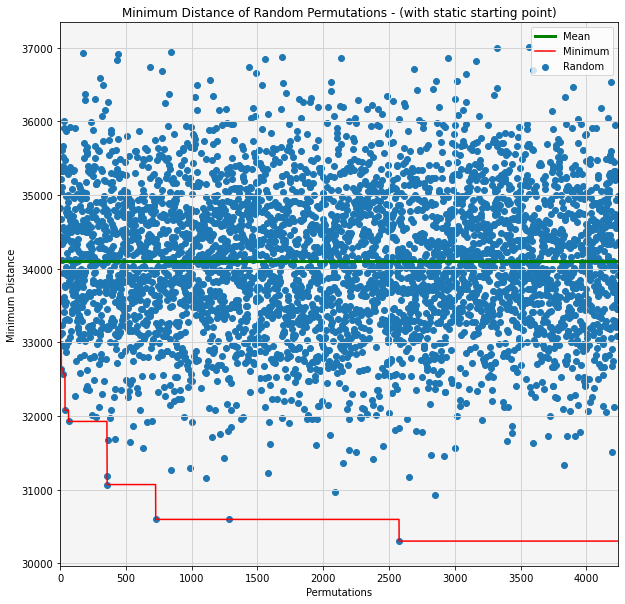

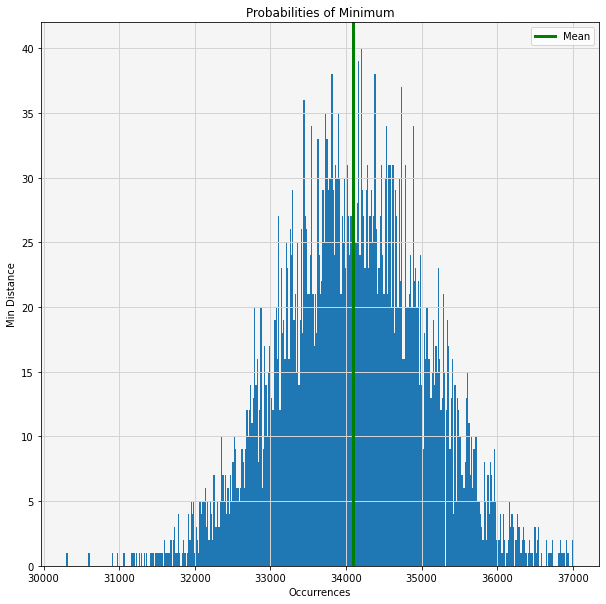

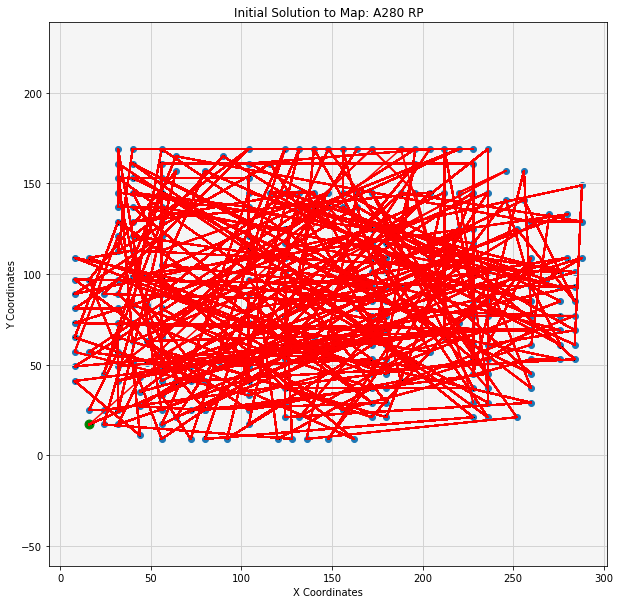

In [6]:
distances, mD, bestSequence = random_permutations(A280, startingCity=96, exTime=5)
print(f"Average minimum Distance = {np.mean(distances)},  "
      f"\n Min % compared to the mean = {mD[-1]/np.mean(distances)*100:.2f}%"
      f"\n % Reduction = {100- mD[-1]/np.mean(distances)*100:.2f}%")

ax = ody.plot()
ax.set_title("Minimum Distance of Random Permutations - (with static starting point)")
ax.scatter([_ for _ in range(len(distances))], distances, label='Random')
ax.plot([_ for _ in range(len(distances))], [np.mean(distances) for _ in range(len(distances))], label='Mean', color='g', linewidth=3)

ax.plot(mD, color="r", label="Minimum")

ax.set_xlabel('Permutations')  ;   ax.set_ylabel('Minimum Distance')
ax.set_xlim(0, len(distances))
ax.legend(loc='upper right')
plt.savefig("RP - Minimum Distance of Random Permutations.png")
plt.show()

# ------
ax = ody.plot()
ax.set_title("Probabilities of Minimum")
ax.hist(distances, bins=400)
ax.axvline(np.mean(distances), color='g', linewidth=3, label="Mean")

ax.set_xlabel('Occurrences')  ;   ax.set_ylabel('Min Distance')
plt.legend(loc='upper right')
plt.savefig("RP - Probabilities of Minimum.png")
plt.show()

# -------
plot_journey(A280, bestSequence, "A280 RP")

### Initializing the sequence that the TSP will go to using Euclidean Distance (greedy heuristic) and the default city sequence (from the txt file)

In [7]:
"""EI51"""  ;    print("Map : EI51", end="\n\n")

"""Starting City: of the traveling salesman. Can also be random."""
SC = 40 ; print(f"Deterministically deciding the starting city of the TSP  = {SC}", end="\n\n")
# SC = np.random.randint(0, EI51.shape[0])    ;   print(f"Randomly Selected Starting City (SP) = {SC}", end="\n\n")

inf = np.square(EI51[:, 0].max() - EI51[:, 0].min())   +    np.square(EI51[:, 1].max() - EI51[:, 1].min())
# maxDist= np.square(EI51[:, 0].max( )- EI51[:, 0].min())   +    np.square(EI51[:, 1].max() - EI51[:, 1].min())
print(f"+infinity number used: {inf}", end="\n\n")

# cpe : copy=True has to be used to avoid changing values in both arrays.
# orderA280 = stores the order (sequence) of that the TSP will travel to
# DistanceTraveledEI51 : list for the distance of each journey
cpe = np.array(EI51, copy=True)  ;   orderEI51 = [SC]  ;   DistanceTraveledEI51 = []
# Current City  -   adjusted for starting form 1
cc = SC-1
# Getting the Coordinates of the Starting City
x , y = EI51[SC-1, 0] , EI51[SC-1, 1]
# Setting the Coordinates of the starting city to inf,inf (inf based on dtype)  in the temp array so it wont be selected.
cpe[SC-1, 0], cpe[SC-1, 1] = cpe[SC-1, 0] + inf , cpe[SC-1, 1] + inf
tArray = np.zeros(EI51.shape[0], dtype=EI51.dtype)
for i in range(EI51.shape[0]-1):
    # Finds the city with the smallest euclidean distance from the current city (cc)
    tArray = np.square(EI51[cc, 0] - cpe[:, 0])   +    np.square(EI51[cc, 1] - cpe[:, 1])
    cc = np.argmin(tArray)
    DistanceTraveledEI51.append(np.sqrt(tArray[cc]))

    cpe[cc, 0], cpe[cc, 1] = cpe[cc, 0] + inf, cpe[cc, 1] + inf
    orderEI51.append(cc+1)
# Going back to the first city
DistanceTraveledEI51.append(np.sqrt(np.square(EI51[cc, 0] - EI51[SC-1, 0])   +    np.square(EI51[cc, 1] - EI51[SC-1, 1])))
orderEI51.append(SC)
print(f"Total Distance Traveled = {np.sum(DistanceTraveledEI51):0.2f}")
# print(f"Total Distance Table = {DistanceTraveledEI51}")
print(f"Order which the TSP will visit the cities:")
print(orderEI51, end="\n\n")

Map : EI51

Deterministically deciding the starting city of the TSP  = 40

+infinity number used: 7333

Total Distance Traveled = 570.92
Order which the TSP will visit the cities:
[40, 19, 41, 13, 25, 14, 6, 48, 27, 51, 46, 12, 47, 4, 17, 37, 15, 44, 42, 45, 33, 10, 49, 9, 50, 16, 2, 29, 21, 34, 30, 39, 5, 38, 11, 32, 1, 22, 28, 31, 8, 26, 7, 23, 24, 43, 18, 3, 20, 35, 36, 40]



In [8]:
"""A280"""  ;    print("Map : A280", end="\n\n")

"""Starting City: of the traveling salesman. Can also be random."""
SC = 96 ; print(f"Deterministically deciding the starting city of the TSP  = {SC}", end="\n\n")
# SC = np.random.randint(0, EI51.shape[0])    ;   print(f"Randomly Selected Starting City (SP) = {SC}", end="\n\n")

inf = np.square(A280[:, 0].max() - A280[:, 0].min())   +    np.square(A280[:, 1].max() - A280[:, 1].min())
print(f"+infinity number used: {inf}", end="\n\n")

# cpa : copy=True has to be used to avoid changing values in both arrays.
# orderA280 = stores the order (sequence) of that the TSP will travel to
# DistanceTraveledA280 : list for the distance of each journey
cpa = np.array(A280, copy=True)  ;   orderA280 = [SC]  ;   DistanceTraveledA280 = []
# Current City
cc = SC-1
# Getting the Coordinates of the Starting City
x , y = A280[SC-1, 0] , A280[SC-1, 1]
# Setting the Coordinates of the starting city to inf,inf (inf based on dtype)  in the temp array so it wont be selected.
cpa[SC-1, 0], cpa[SC-1, 1] = cpa[SC-1, 0] + inf , cpa[SC-1, 1] + inf
tArray = np.zeros(A280.shape[0], dtype=A280.dtype)
for i in range(A280.shape[0]-1):
    # Finds the city with the smallest euclidean distance from the current city (cc)
    tArray = np.square(A280[cc, 0] - cpa[:, 0])   +    np.square(A280[cc, 1] - cpa[:, 1])
    cc = np.argmin(tArray)
    DistanceTraveledA280.append(np.sqrt(tArray[cc]))

    cpa[cc, 0], cpa[cc, 1] = cpa[cc, 0] + inf, cpa[cc, 1] + inf
    orderA280.append(cc+1)

DistanceTraveledA280.append(np.sqrt(np.square(A280[cc, 0] - A280[SC-1, 0])   +    np.square(A280[cc, 1] - A280[SC-1, 1])))
orderA280.append(SC)
print(f"Total Distance Traveled = {np.sum(DistanceTraveledA280):0.2f}")
# print(f"Total Distance Table = {DistanceTraveledA280}")
print(f"Order which the TSP will visit the cities:")
print(orderA280, end="\n\n\n")

Map : A280

Deterministically deciding the starting city of the TSP  = 96

+infinity number used: 104000

Total Distance Traveled = 3246.54
Order which the TSP will visit the cities:
[96, 95, 94, 93, 98, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 173, 174, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 108, 110, 111, 114, 113, 87, 84, 83, 82, 81, 80, 79, 76, 75, 74, 73, 72, 71, 70, 67, 66, 65, 64, 63, 62, 118, 61, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 31, 30, 125, 124, 123, 122, 121, 120, 119, 157, 158, 159, 160, 175, 181, 176, 177, 151, 152, 156, 153, 155, 154, 129, 128, 21, 20, 19, 18, 17, 133, 132, 131, 130, 127, 126, 29, 28, 27, 26, 22, 25, 23, 24, 14, 13, 12, 11, 10, 8, 7, 9, 275, 274, 273, 272, 271, 16, 15, 270, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 178, 179, 180, 182, 183, 184, 185, 187, 186, 189, 188, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

In [9]:
"""PCB442"""  ;    print("Map : PCB442", end="\n\n")

"""Starting City: of the traveling salesman. Can also be random."""
SC = 442 ; print(f"Deterministically deciding the starting city of the TSP  = {SC}", end="\n\n")
# SC = np.random.randint(0, EI51.shape[0])    ;   print(f"Randomly Selected Starting City (SP) = {SC}", end="\n\n")

inf = np.square(PCB442[:, 0].max() - PCB442[:, 0].min())   +    np.square(PCB442[:, 1].max() - PCB442[:, 1].min())
print(f"+infinity number used: {inf}", end="\n\n")

# cpp : copy=True has to be used to avoid changing values in both arrays.
# orderA280 = stores the order (sequence) of that the TSP will travel to
# DistanceTraveledPCB442 : list for the distance of each journey
cpp = np.array(PCB442, copy=True)  ;   orderPCB442 = [SC]  ;   DistanceTraveledPCB442 = []
# Current City
cc = SC-1
# Getting the Coordinates of the Starting City
x , y = PCB442[SC-1, 0] , PCB442[SC-1, 1]
# Setting the Coordinates of the starting city to inf,inf (inf based on dtype)  in the temp array so it wont be selected.
cpp[SC-1, 0], cpp[SC-1, 1] = cpp[SC-1, 0] + inf, cpp[SC-1, 1] + inf
tArray = np.zeros(PCB442.shape[0], dtype=PCB442.dtype)
for i in range(PCB442.shape[0]-1):
    # Finds the city with the smallest euclidean distance from the current city (cc)
    tArray = np.square(PCB442[cc, 0] - cpp[:, 0])   +    np.square(PCB442[cc, 1] - cpp[:, 1])
    cc = np.argmin(tArray)
    DistanceTraveledPCB442.append(np.sqrt(tArray[cc]))
    cpp[cc, 0], cpp[cc, 1] = cpp[cc, 0] + inf, cpp[cc, 1] + inf
    orderPCB442.append(cc + 1)

DistanceTraveledPCB442.append(np.sqrt(np.square(PCB442[cc, 0] - PCB442[SC-1, 0])   +    np.square(PCB442[cc, 1] - PCB442[SC-1, 1])))
orderPCB442.append(SC)
print(f"Total Distance Traveled = {sum(DistanceTraveledPCB442):0.2f}")
# print(f"Total Distance Table = {DistanceTraveledPCB442}")
print(f"Order which the TSP will visit the cities:")
print(orderPCB442, end="\n\n")


Map : PCB442

Deterministically deciding the starting city of the TSP  = 442

+infinity number used: 23440000

Total Distance Traveled = 61984.05
Order which the TSP will visit the cities:
[442, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 376, 377, 33, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 378, 88, 89, 90, 91, 92, 93, 94, 95, 379, 96, 380, 97, 98, 383, 384, 113, 125, 135, 148, 160, 171, 184, 199, 210, 220, 226, 411, 410, 414, 237, 265, 420, 268, 416, 264, 263, 236, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 415, 249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 235, 228, 406, 401, 186, 173, 162, 150, 137, 127, 386, 115, 104, 441, 102, 103, 114, 126, 136, 149, 161, 172, 185, 400, 405, 227, 234, 238, 239, 266, 269, 27

#### Testing different random permutations before applying euclidean calculations.
Algorithm name = "Random Euclidean Sums"
*Different seed used each time, so each permutation is unique

In [10]:
%matplotlib
LIVE_PLOT = False

def initSequence(IA, startingCity=1, exTime=5, printStats=True):
    pc = -1* np.ones((IA.shape[0], 3), dtype=int)
    for i in range(IA.shape[0]):
        pc[i, 0] = IA[i, 0]
        pc[i, 1] = IA[i, 1]
        pc[i, 2] = i + 1

    distances = []    ;   mD = []   ;   counter = 0
    bestSequence = []   ;   flag = True
    SC = startingCity   ;   ST = time.time()    ;   pbar = tqdm(total=100)  ;   ps=1
    while True:
        if time.time() - ST > exTime: break
        np.random.seed(counter) #Has a new unique permutation each time to avoid randomly permuting to a state that was previously calculated
        LOC = np.random.permutation(pc)

        """Calculation Part"""
        maxDist = np.square(LOC[:, 0].max()-LOC[:, 0].min())   +    np.square(LOC[:, 1].max()-LOC[:, 1].min())
        loc = np.array(LOC, copy=True)  ;   orderLOC = [SC]  ;   DT = -1*np.ones(LOC.shape[0]+1, dtype=float)

        # Getting the Coordinates of the Starting City
        scLoc = np.where(LOC[:,2] == SC)[0][0]
        x , y = LOC[scLoc, 0] , LOC[scLoc, 1]
        # Setting the Coordinates of the starting city to inf,inf (inf based on dtype)  in the temp array so it wont be selected.
        loc[scLoc, 0], loc[scLoc, 1] = loc[scLoc, 0] + maxDist, loc[scLoc, 1] + maxDist
        cc = scLoc
        tArray = np.zeros(LOC.shape[0], dtype=LOC.dtype)

        for i in range(LOC.shape[0]-1):
            # Finds the city with the smallest euclidean distance from the current city (cc)
            tArray = np.square(LOC[cc, 0] - loc[:, 0])   +    np.square(LOC[cc, 1] - loc[:, 1])

            cc = np.argmin(tArray)
            DT[i] = np.sqrt(tArray[cc])
            loc[cc, 0], loc[cc, 1] = loc[cc, 0] +  maxDist, loc[cc, 1] + maxDist

            orderLOC.append(LOC[cc, 2])
        DT[i+1] = (np.sqrt(np.square(LOC[cc, 0] - LOC[scLoc, 0])   +    np.square(LOC[cc, 1] - LOC[scLoc, 1])))
        orderLOC.append(SC)
        distances.append(DT.sum())

        if counter == 0 :
            mD.append(DT.sum())
            bestSequence = orderLOC
        elif DT.sum() < mD[-1]:
            mD.append(DT.sum())
            bestSequence = orderLOC
            if not bestSequence == orderLOC: flag=False
        else: mD.append(mD[-1])

        if LIVE_PLOT:
            if counter%50 == 0:
                plt.scatter([_ for _ in range(len(distances))], distances)
                plt.plot(mD)
                plt.pause(0.003)

        counter += 1
        if time.time() - ST > ps: pbar.update(int(1/exTime*100)) ;   ps+=1
    if printStats:
        print(f" Starting City = {SC} @({pc[pc[:,2]==SC, 0][0]} , {pc[pc[:,2]==SC, 1][0]})")
        print(f" Solutions to the Problem Found = {np.unique(distances).shape[0] }")
        print(f" Unique solution to the problem = {flag}")
        print(f" Minimum Distance: {mD[-1]:.2f}")
        print(f" Sequence: ")
        print(f"  {bestSequence}")
    return np.array(distances), np.array(mD), np.array(bestSequence)
# initSequence(EI51, startingCity=1, exTime=3)

Using matplotlib backend: MacOSX


100%|██████████| 100/100 [00:05<00:00, 19.94it/s]


 Starting City = 96 @(16 , 17)
 Solutions to the Problem Found = 1517
 Unique solution to the problem = True
 Minimum Distance: 3029.81
 Sequence: 
  [96, 95, 94, 93, 98, 97, 99, 100, 101, 102, 103, 104, 108, 110, 111, 114, 115, 117, 118, 61, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 125, 124, 123, 122, 121, 120, 119, 157, 158, 159, 160, 175, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 171, 173, 106, 107, 105, 109, 89, 81, 82, 83, 84, 85, 65, 64, 63, 62, 116, 86, 87, 113, 112, 88, 90, 91, 92, 80, 79, 76, 75, 74, 73, 72, 71, 70, 67, 66, 68, 69, 58, 59, 44, 45, 56, 57, 55, 54, 53, 52, 49, 50, 51, 48, 47, 46, 126, 127, 128, 21, 130, 131, 20, 19, 18, 17, 133, 132, 134, 270, 269, 268, 267, 266, 138, 139, 148, 147, 146, 145, 144, 143, 142, 141, 140, 265, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255, 252, 253, 208, 207, 212, 213, 216, 215, 218, 217, 220, 221, 222, 219, 223, 224, 225, 226, 227, 228, 229, 230, 251, 250, 247, 244, 245, 246, 239, 238, 237, 232, 23

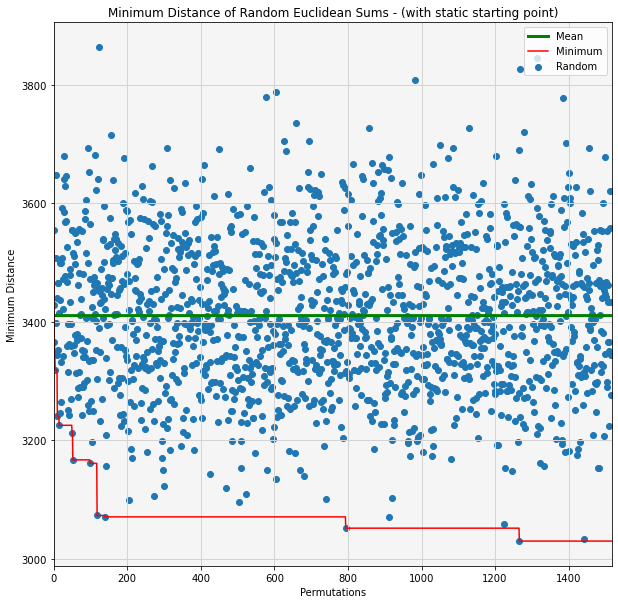

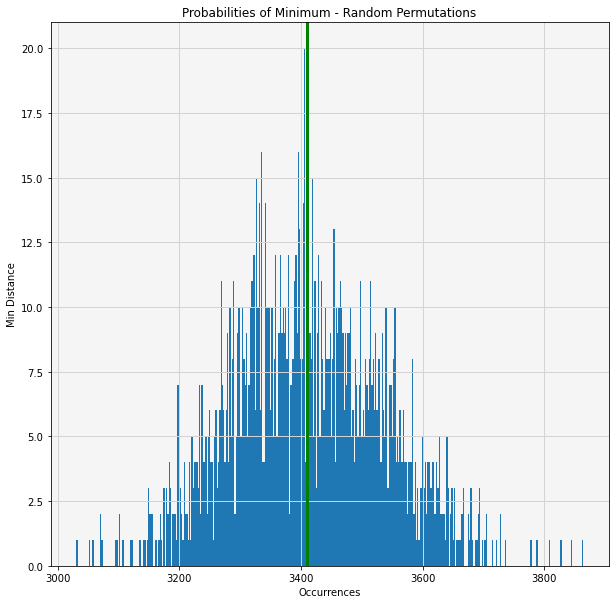

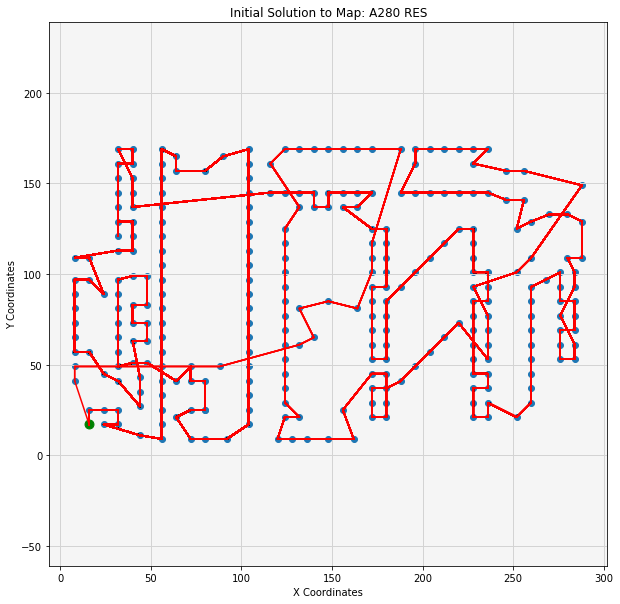

In [11]:
"""Testing the Function"""  ;  city=EI51   #;   city=A280   ;   city=PCB442
%matplotlib inline
# print(f"Testing the Function with city EI51", end="\n\n")
distances, mD, bestSequence = initSequence(A280, startingCity=96, exTime=5)
print(f"Average minimum Distance = {np.mean(distances)},  "
      f"\n Min % compared to the mean = {mD[-1]/np.mean(distances)*100:.2f}%"
      f"\n % Reduction = {100- mD[-1]/np.mean(distances)*100:.2f}%")

ax = ody.plot()
ax.set_title("Minimum Distance of Random Euclidean Sums - (with static starting point)")
ax.scatter([_ for _ in range(len(distances))], distances, label='Random')
ax.plot([_ for _ in range(len(distances))], [np.mean(distances) for _ in range(len(distances))], label='Mean', color='g', linewidth=3)

ax.plot(mD, color="r", label="Minimum")

ax.set_xlabel('Permutations')  ;   ax.set_ylabel('Minimum Distance')
ax.set_xlim(0, len(distances))
ax.legend(loc='upper right')
plt.savefig("RES - Minimum Distance of Random Euclidean Sums.png")
plt.show()

# ------
ax = ody.plot()
ax.set_title("Probabilities of Minimum - Random Permutations")
ax.hist(distances, bins=400)
ax.axvline(np.mean(distances), color='g', linewidth=3, label="Mean")

ax.set_xlabel('Occurrences')  ;   ax.set_ylabel('Min Distance')
plt.savefig("RES - Probabilities of Minimum.png")
plt.show()

# ------
plot_journey(A280, bestSequence, "A280 RES")

## Overlapping Plotting of Random Permutations and Random Euclidean Sums

 99%|█████████▉| 99/100 [00:03<00:00, 32.99it/s]


RP Distances Calculated: 10822 
RES Distances Calculated: 5426 

Average Distance for Random Permutations = 1654.13 
Average Distance for Random Euclidean Sums = 557.12
 
Minimum Distance for Random Permutations = 1299.44 
Minimum Distance for Random Euclidean Sums = 536.35  


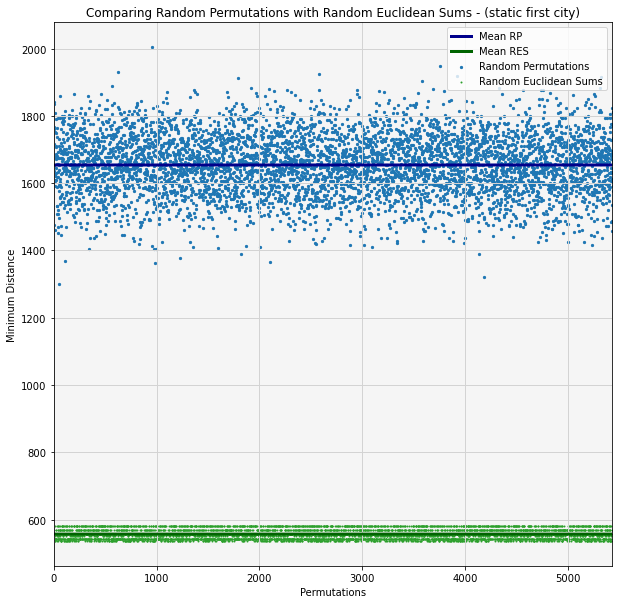

In [12]:
distancesRR, mDRR, bestSequenceRR = random_permutations(EI51, startingCity=40, exTime=3)
distancesRP, mDRP, bestSequenceRP = initSequence(EI51, startingCity=40, exTime=3, printStats=False)

print(f"RP Distances Calculated: {len(distancesRR)} \n"
      f"RES Distances Calculated: {len(distancesRP)} \n")
print(f"Average Distance for Random Permutations = {np.mean(distancesRR):.2f} \n"
      f"Average Distance for Random Euclidean Sums = {np.mean(distancesRP):.2f}\n ")
print(f"Minimum Distance for Random Permutations = {np.min(distancesRR):.2f} \n"
      f"Minimum Distance for Random Euclidean Sums = {np.min(distancesRP):.2f}  ")

ax = ody.plot()
ax.set_title("Comparing Random Permutations with Random Euclidean Sums - (static first city)")
ax.scatter([_ for _ in range(len(distancesRR))], distancesRR, label='Random Permutations', s=5, color='tab:blue')
ax.scatter([_ for _ in range(len(distancesRP))], distancesRP, label='Random Euclidean Sums', s=1, color='tab:green')
ax.plot([_ for _ in range(len(distancesRR))], [np.mean(distancesRR) for _ in range(len(distancesRR))], label='Mean RP', color='darkblue', linewidth=3)
ax.plot([_ for _ in range(len(distancesRP))], [np.mean(distancesRP) for _ in range(len(distancesRP))], label='Mean RES', color='darkgreen', linewidth=3)

# ax.plot(mD, color="r", label="Minimum")

ax.set_xlabel('Permutations')  ;   ax.set_ylabel('Minimum Distance')
ax.set_xlim(0, len(distancesRP))
ax.legend(loc='upper right')
plt.savefig("Comparing Random Permutations with Random Euclidean Sum.png")
plt.show()

#Tried to plot the comparison in histogram form, but its not working since the 2 arrays have different size of elements

In [13]:
"""
Setting the Initial best sequence with given arguments
(input 1)       :np.array which includes the coordinates of the cities
startingCity    :The starting (and ending city of the TSP. (default is 1)
exTime          :How much time we will allow the algorithm to search for the best initial sequence
"""

"""EI51"""        ;         print("\n\nMap : EI51")
distancesE, mD_E, bestSequenceE = initSequence(EI51, startingCity=40, exTime=4)

"""A280"""        ;         print("\n\nMap : A280")
distancesA, mD_A, bestSequenceA = initSequence(A280, startingCity=96, exTime=7)

"""PCB442"""        ;       print("\n\nMap : PCB442")
distancesP, mD_P, bestSequenceP = initSequence(PCB442, startingCity=442, exTime=10)



Map : EI51


100%|██████████| 100/100 [00:04<00:00, 24.99it/s]


 Starting City = 40 @(5 , 6)
 Solutions to the Problem Found = 6
 Unique solution to the problem = True
 Minimum Distance: 536.35
 Sequence: 
  [40, 19, 41, 13, 25, 14, 6, 48, 27, 51, 46, 12, 47, 4, 18, 17, 37, 15, 44, 45, 33, 10, 49, 9, 50, 16, 2, 29, 21, 34, 30, 39, 5, 38, 11, 32, 1, 22, 28, 31, 8, 26, 7, 23, 24, 43, 3, 20, 35, 36, 42, 40]


Map : A280


 98%|█████████▊| 98/100 [00:07<00:00, 13.99it/s]


 Starting City = 96 @(16 , 17)
 Solutions to the Problem Found = 2475
 Unique solution to the problem = True
 Minimum Distance: 3029.81
 Sequence: 
  [96, 95, 94, 93, 98, 97, 99, 100, 101, 102, 103, 104, 108, 110, 111, 114, 115, 117, 118, 61, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 125, 124, 123, 122, 121, 120, 119, 157, 158, 159, 160, 175, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 171, 173, 106, 107, 105, 109, 89, 81, 82, 83, 84, 85, 65, 64, 63, 62, 116, 86, 87, 113, 112, 88, 90, 91, 92, 80, 79, 76, 75, 74, 73, 72, 71, 70, 67, 66, 68, 69, 58, 59, 44, 45, 56, 57, 55, 54, 53, 52, 49, 50, 51, 48, 47, 46, 126, 127, 128, 21, 130, 131, 20, 19, 18, 17, 133, 132, 134, 270, 269, 268, 267, 266, 138, 139, 148, 147, 146, 145, 144, 143, 142, 141, 140, 265, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255, 252, 253, 208, 207, 212, 213, 216, 215, 218, 217, 220, 221, 222, 219, 223, 224, 225, 226, 227, 228, 229, 230, 251, 250, 247, 244, 245, 246, 239, 238, 237, 232, 23

100%|██████████| 100/100 [00:10<00:00, 10.00it/s]

 Starting City = 442 @(0 , 0)
 Solutions to the Problem Found = 2191
 Unique solution to the problem = True
 Minimum Distance: 59596.98
 Sequence: 
  [442, 1, 2, 35, 67, 68, 69, 37, 36, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 54, 53, 52, 84, 85, 86, 87, 378, 88, 89, 90, 58, 57, 24, 23, 22, 55, 56, 25, 26, 27, 60, 61, 62, 63, 30, 31, 32, 376, 377, 33, 65, 97, 380, 96, 379, 95, 94, 93, 92, 91, 59, 28, 29, 64, 98, 383, 384, 113, 125, 135, 148, 160, 171, 184, 199, 210, 220, 226, 411, 410, 414, 237, 265, 420, 272, 423, 438, 268, 416, 264, 263, 236, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 415, 249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 235, 228, 406, 401, 186, 173, 162, 150, 151, 137, 127, 386, 115, 104, 441, 102, 103, 114, 126, 136, 149, 161, 172, 185, 400, 405, 227, 234, 238, 239, 266, 269, 273, 276, 279, 281, 282, 428, 342, 341, 346, 347, 348, 433, 349, 350, 351, 352, 343, 353, 354, 355, 434, 356, 357, 358, 435, 359, 360, 361, 3

### % Percentage Reduction in the min Travel Distance by running multiple random permutations"
*result = LowestMinDistance/Mean(MinDistances) ** 100

In [14]:
print(tabulate([[(1 - mD_E[-1]/np.mean(distancesE))*100 , (1 - mD_A[-1]/np.mean(distancesA))*100, (1 - mD_P[-1]/np.mean(distancesP))*100]],
               headers=["EI51", "A280", "PCB442"], floatfmt=['0.2f', '0.2f', '0.2f']))

  EI51    A280    PCB442
------  ------  --------
  3.74   11.15      7.51


## Map Solutions after running "Random Euclidean Sum" algorithm.



Map : EI51


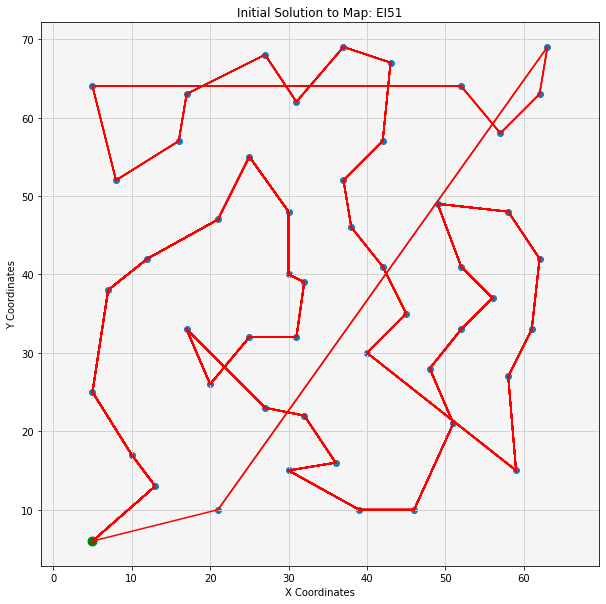

Traveled Distance: 536.35


Map : A280


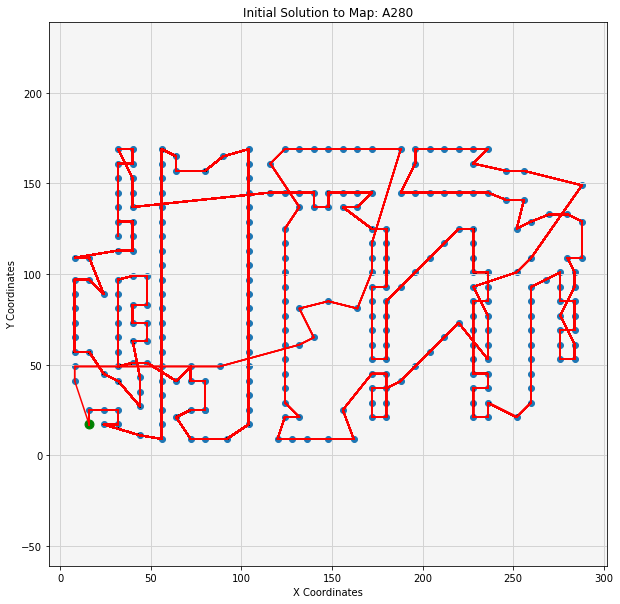

Traveled Distance: 3029.81


Map : PCB442


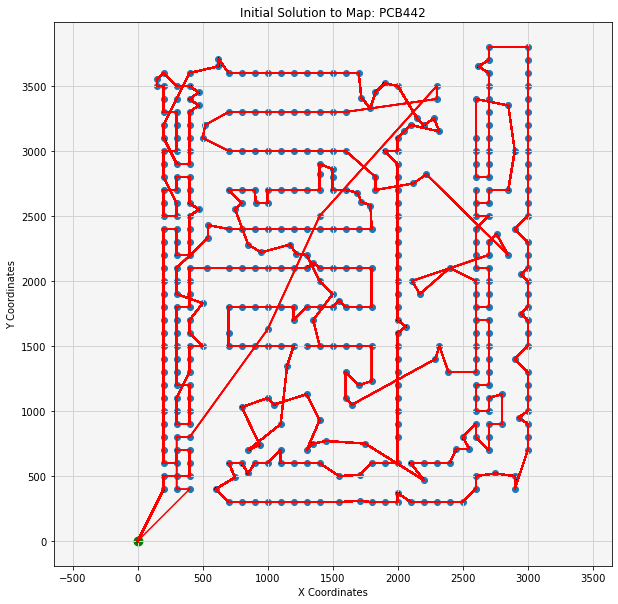

Traveled Distance: 59596.98


In [15]:
"""
Visualize Traveling a Map
"""
%matplotlib inline
inline = False
inline = True
"""EI51"""        ;         print("\n\nMap : EI51")
plot_journey(EI51, bestSequenceE, "EI51", rate=0.5, inline=inline)
print(f"Traveled Distance: {mD_E[-1]:.2f}")

"""A280"""        ;         print("\n\nMap : A280")
plot_journey(A280, bestSequenceA, "A280", rate=0.05, inline=inline)
print(f"Traveled Distance: {mD_A[-1]:.2f}")

"""PCB442"""        ;       print("\n\nMap : PCB442")
plot_journey(PCB442, bestSequenceP, "PCB442", rate=0.01, inline=inline)
print(f"Traveled Distance: {mD_P[-1]:.2f}")

# Background Theory for Simulated Annealing
### Plot using Exponential notation

In [16]:
# Create plots for differnt values of lambda
A = np.sort(np.append(np.random.rand(100), [0,1]))
expBlue = np.exp(-1 * A)
expGreen = np.exp(-2 * A)
expRed = np.exp(-5 * A)

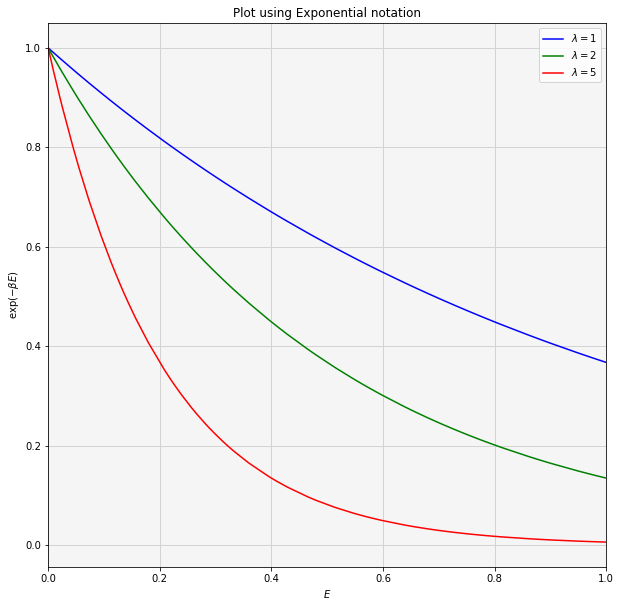

In [17]:
# Plot distributions
ax = ody.plot()
ax.set_title("Plot using Exponential notation")
ax.plot(A, expBlue, 'blue', label = r'$\lambda = 1$')
ax.plot(A, expGreen, 'green', label = r'$\lambda = 2$')
ax.plot(A, expRed, 'red', label = r'$\lambda = 5$')
ax.set_xlabel(r'$E$')  ;   ax.set_ylabel(r'exp($-\beta E$)')
ax.set_xlim(0,1)
plt.legend()
plt.savefig("Plot using Exponential notation")
plt.show()

### Boltzmann distribution function

In [18]:
N = [5,10, 20]
iterations = 10_0000
for n in N:
    E_tot = np.zeros((iterations, n))
    # print(E_tot.shape)
    for i in range(iterations):

        # 1. Store N-1 random numbers in an array   2. Append 0 and total energy    3. Sort
        A = np.sort(np.append(np.random.rand(n-1), [0,1]))

        # Compute energy of particle by substracting the consecutive values of A
        E = np.zeros((A.shape[0]-1))
        for i2 in range(A.shape[0]-1):
            E[i2] = A[i2+1] - A[i2]
        E_tot[i, :]= E

    if n == 5:
        flat_E_five = [item for sublist in E_tot for item in sublist]
    if n == 10:
        flat_E_ten = [item for sublist in E_tot for item in sublist]
    if n == 20:
        flat_E_twenty = [item for sublist in E_tot for item in sublist]

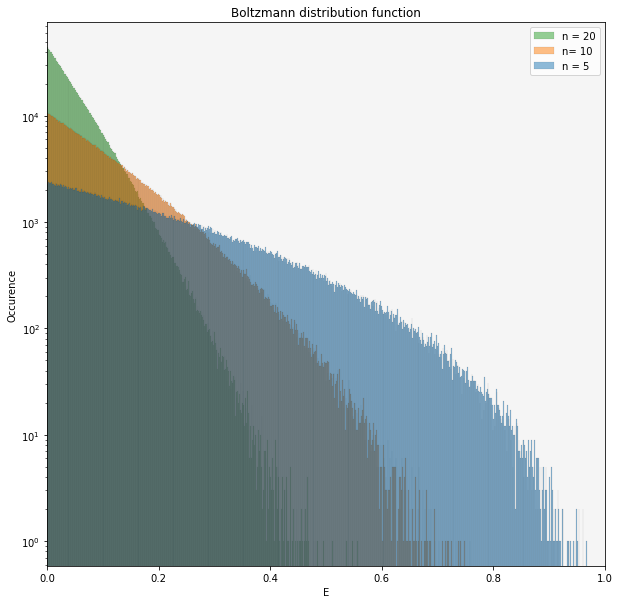

In [19]:
"""Boltzmann distribution function"""
fig = plt.figure()
fig.set_facecolor('w')
fig.set_size_inches(10, 10, forward=True)
fig.tight_layout()
ax = fig.add_subplot()

ax.set_facecolor('whitesmoke')
ax.set_title("Boltzmann distribution function")

g = sns.histplot([flat_E_five, flat_E_ten,flat_E_twenty])
g.set_yscale('log')
g.set(xlabel = 'E', ylabel =  'Occurence')
g.set(xlim = (0,1))
plt.legend(labels=["n = 20", "n= 10", "n = 5"])
plt.savefig("Boltzmann distribution function"); plt.show()

# Simulated Annealing Section
 - Initialising the initial sequence using Random Euclidean Sum initialization
 - Running Simulated Annealing with 2-opt

In [20]:
def euclidean_weighted_random_choice(sequence, map, stochasticity_coefficient=1, print_report=False):
    ns = np.zeros(sequence.shape[0]) ; ns[0] = sequence[0]  ;   ns[-1] = sequence[-1]
    remaining_cities = sequence[1: -1].tolist()
    cc = sequence[0] # current city : int
    for i in range(1, sequence.shape[0]-1):
        distances = float('inf')+np.zeros((len(remaining_cities),2))
        distances[:,0] = remaining_cities
        ccc = [map[map[:, 2] == cc][0][0], map[map[:, 2] == cc][0][1]]
        for city in distances:
            # calculate the distance to an available city.
            city[1] = np.square(ccc[0] - map[map[:, 2] == city[0]][0][0]) + np.square(ccc[1] - map[map[:, 2] == city[0]][0][1])
        distances[:,1] = np.power(distances[:,1], -stochasticity_coefficient)
        distances[:,1] = (distances[:,1] / distances[:,1].sum())
        if print_report: return np.sort(distances[:,1])[::-1]
        ns[i] = np.random.choice(distances[:,0], p=distances[:,1]).astype(int)
        cc = ns[i]
        remaining_cities.remove(ns[i])
    return ns.astype(int)

In [21]:
def _3_opt(sequence, indexes):
    i, j, k = indexes
    def distance(cityA, cityB):
        # print(map[map[:, 2] == cityA][0, 0])
        return np.square(map[map[:, 2] == cityB][0][0] - map[map[:, 2] == cityA][0][0]) + np.square(map[map[:, 2] == cityB][0][1] - map[map[:, 2] == cityA][0][1])
    # Given tour [...A-B...C-D...E-F...]
    A, B, C, D, E, F = sequence[i-1], sequence[i], sequence[j-1], sequence[j], sequence[k-1], sequence[k] # % sequence.shape[0]]

    d0 = distance(A, B) + distance(C, D) + distance(E, F)   # Standard
    d1 = distance(A, C) + distance(B, D) + distance(E, F)   # a'
    d2 = distance(A, B) + distance(C, E) + distance(D, F)   # b'
    d3 = distance(F, B) + distance(C, D) + distance(E, A)   # c'
    d4 = distance(A, D) + distance(E, B) + distance(C, F)   

    if d0 > d1:
        sequence[i:j] = sequence[i:j][::-1]
        # return -d0 + d1
    elif d0 > d2:
        sequence[j:k] = sequence[j:k][::-1]
        # return -d0 + d2
    elif d0 > d3:
        sequence[i:k] = sequence[i:k][::-1]
        # return -d0 + d4
    elif d0 > d4:
        sequence[i:k] = np.append(sequence[j:k], sequence[i:j])
        # return -d0 + d3
    return sequence

In [22]:
%matplotlib inline
'''
This implements the simulated annealing algorithm
'''

def simulatedAnnealing(map, startingSity=1, IS=-1, T_input=-1, ITERATIONS=50_000, ALPHA=0.9999, method=-1, print_stats=False):
    iteration = 0       ;   stopingI = ITERATIONS
    N = map.shape[0] + 1 # N : Size of the sequence = number of cities + 1, as the TSP goes back to the starting city
    if T_input == -1:
        T = np.sqrt(N-2)
        T_input = np.sqrt(N-2)
    else:
        T = T_input

    stopingT = 1e-8 ;

    # Statistics
    temperaturesList = np.zeros(stopingI)   ;   annealing_D = np.zeros(stopingI) # To be normalized minimum traveled distances

    if IS == -1:
        # Step 1, get initial (Best) sequence, either random or from RES or from file
        _ , mDL, bestSequence = initSequence(map, startingCity=startingSity, exTime=0.2, printStats=False)    ;   bestDistance = mDL[-1] # current minimum distance
        # _ , mDL, bestSequence = random_permutations(map, startingCity=startingSity, exTime=1)    ;   bestDistance = mDL[-1] # current minimum distance
    else:
        mDL, bestSequence = IS    ;   bestDistance = mDL[-1]

    if print_stats: print(f"Initial Distance = {bestDistance}")
    initDistance = bestDistance

    current_S = bestSequence   ;   cmd = bestDistance
    while iteration < stopingI: # and T >= stopingT:
        candidate = np.array(current_S, copy=True)

        if method == 'ewrc':
            l = np.random.randint(1, high=(N - 2))
            i = np.random.randint(1, high=(N - l))
            candidate[i : (i + l)] = euclidean_weighted_random_choice(candidate[i : (i + l)], map=map, stochasticity_coefficient=1)

        elif method == '3-opt':
            # i = np.random.randint(1, N-5)
            # j = np.random.randint(i+1, N-3)
            # k = np.random.randint(j+1, N-1)
            # candidate = _3_opt(candidate, [i, j, k])

            i = np.random.randint(1, N-1)
            j = np.random.randint(1, N-1)
            while j == i or j == i-1 or j == i+1: j = np.random.randint(1, N-1)
            k = j = np.random.randint(1, N-1)
            while k==i or k==i-1 or k==i+1\
                    or k==j or k==j-1 or k==j+1: k = np.random.randint(1, N-1)
            candidate = _3_opt(candidate, np.sort([i, j, k]))
            # print(candidate);print(candidate.shape);print()
        else:
            l = np.random.randint(1, high=(N - 2))
            i = np.random.randint(1, high=(N - l))
            candidate[i : (i + l)] = candidate[i : (i + l)][::-1]

        cd = calculate_distance(map, candidate) # cd : Candidate's Distance
        if cd < cmd:
            cmd, current_S = cd, candidate
            annealing_D[iteration] = bestDistance
            if cd < bestDistance:
                bestDistance, bestSequence = cd, candidate
                annealing_D[iteration] = bestDistance
        else:
            annealing_D[iteration] = cmd
            if np.random.random(1)[0] < np.exp(-abs(cd - cmd) / T):
                # print(f'old cmd = {}')
                cmd, current_S = cd, candidate

        T *= ALPHA
        temperaturesList[iteration] = T
        iteration += 1

    annealing_D = annealing_D[annealing_D > 0]

    if print_stats:
        print(f"Final Minimum Distance = {bestDistance}")
        print(f"\nImprovement over greedy heuristic = {(initDistance - bestDistance)/initDistance*100:.2f}%\n")
        print(f"Final T = {T:.4f} - {(T_input-T)/(T_input-stopingT)*100:.2f}%")
        print(f"Iteration {iteration}/{ITERATIONS} - {iteration/ITERATIONS * 100:.2f}%")

    return bestDistance, bestSequence, annealing_D, (annealing_D.max()-annealing_D.min())/T_input*temperaturesList + annealing_D.min()

# bestDistance, bestSequence, annealing_D, _ = simulatedAnnealing(A280, 96, method='3-opt', ITERATIONS=10**4)
# print(bestDistance)

100%|██████████| 100/100 [00:01<00:00, 99.97it/s] 


Initial Distance = 536.3515770972873
Final Minimum Distance = 451.4386297914904

Improvement over greedy heuristic = 15.83%

Final T = 0.0476 - 99.33%
Iteration 50000/50000 - 100.00%


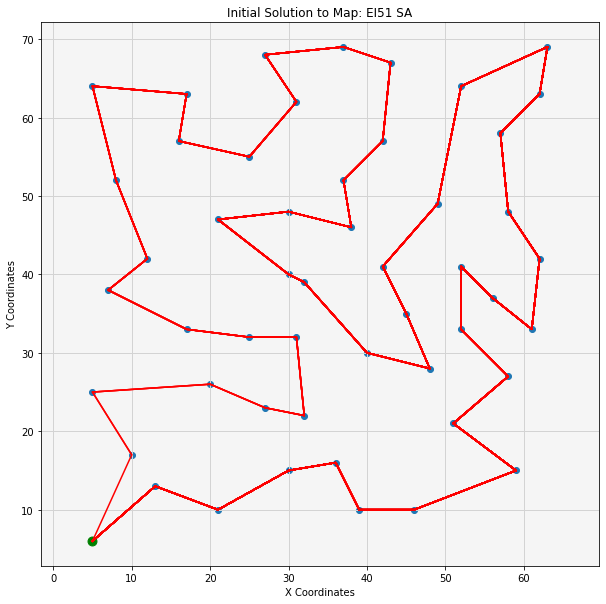

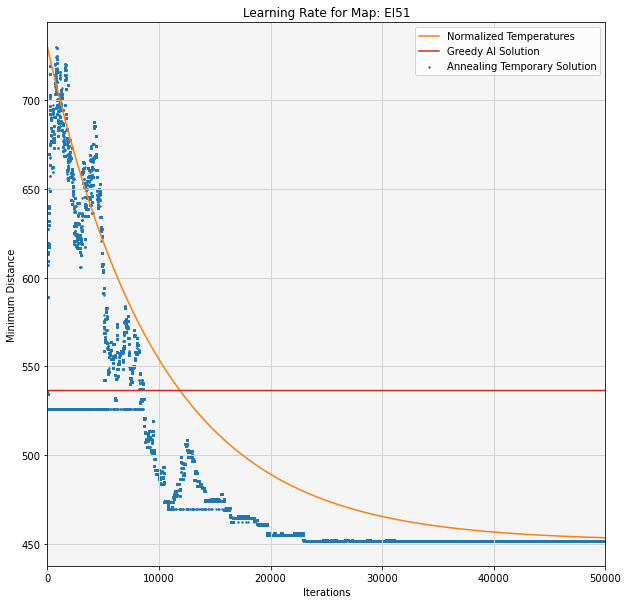

In [23]:
""" Testing Simulated Annealing - EI51 """
name = "EI51"

_ , I_mDL, bestSequence = initSequence(EI51, startingCity=40, exTime=1, printStats=False)
# _ , I_mDL, bestSequence = random_permutations(EI51, startingCity=40, exTime=1)
initS = [I_mDL, bestSequence]
bestDistance, bestSequence, mD, temperaturesList = simulatedAnnealing(EI51, startingSity=40, print_stats=True, IS=initS, ITERATIONS=5*10**4)
plot_journey(EI51, bestSequence, 'EI51 SA')

ax = ody.plot()
ax.set_title("Learning Rate for Map: " + name)
ax.scatter([_ for _ in range(mD.shape[0])], mD, label="Annealing Temporary Solution", s=2, color='tab:blue')
ax.plot([_ for _ in range(mD.shape[0])], temperaturesList, label="Normalized Temperatures", color='tab:orange')
ax.plot([_ for _ in range(mD.shape[0])], [I_mDL[-1] for _ in range(mD.shape[0])], label="Greedy AI Solution", color='tab:red')
ax.set_xlim(0, mD.shape[0])
plt.xlabel('Iterations')   ;   plt.ylabel('Minimum Distance')
plt.legend(loc='upper right')
plt.show()

## Testing Different initialization methods

Alpha Used = 0.999689 
T Used = 5

----- Random Euclidean Sums -----


100%|██████████| 100/100 [00:01<00:00, 99.98it/s] 


Initial Distance = 3049.046930271007
Final Minimum Distance = 2942.1565042643188

Improvement over greedy heuristic = 3.51%

Final T = 0.0100 - 99.80%
Iteration 20000/20000 - 100.00%

----- Best Random Permutation -----


100%|██████████| 100/100 [00:00<00:00, 100.02it/s]


Initial Distance = 30556.22398743124
Final Minimum Distance = 5598.368209834693

Improvement over greedy heuristic = 81.68%

Final T = 0.0100 - 99.80%
Iteration 20000/20000 - 100.00%


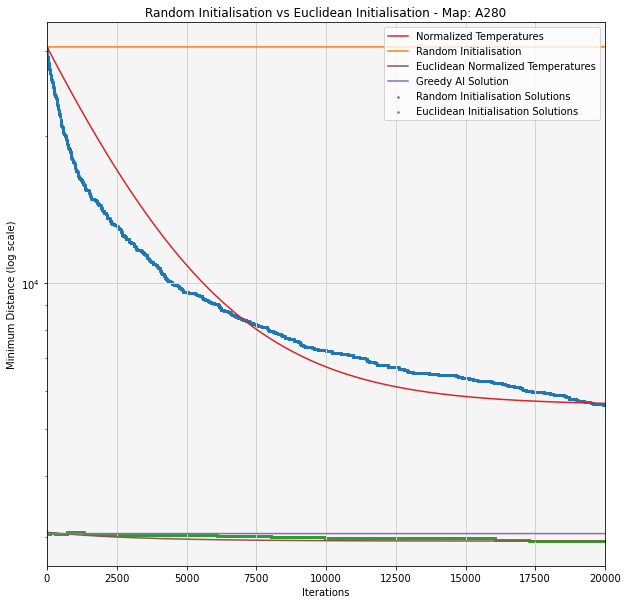

In [45]:
""" Testing Random Initialisation vs Euclidean Initialisation - EI51 """
name = "A280"   ;   map=A280
ITERATIONS=2*10**4
T=5    ;   ALPHA=np.power((0.01/T), 1/ITERATIONS)  ; print(f"Alpha Used = {ALPHA:.6f} \nT Used = {T:.0f}")
""" Euclidean """   ;   print("\n----- Random Euclidean Sums -----")
_ , EI_mDL, EbestSequence = initSequence(map, startingCity=40, exTime=1, printStats=False)
EinitS = [EI_mDL, EbestSequence]
EbestDistance, EbestSequence, EmD, EtemperaturesList = simulatedAnnealing(map, startingSity=40, print_stats=True, IS=EinitS, ITERATIONS=ITERATIONS, ALPHA=ALPHA, T_input=T)
""" Random """   ;   print("\n----- Best Random Permutation -----")
_ , RI_mDL, RbestSequence = random_permutations(map, startingCity=40, exTime=1)
RinitS = [RI_mDL, RbestSequence]
RbestDistance, RbestSequence, RmD, RtemperaturesList = simulatedAnnealing(map, startingSity=40, print_stats=True, IS=RinitS, ITERATIONS=ITERATIONS, ALPHA=ALPHA, T_input=T)

ax = ody.plot()
ax.set_title("Random Initialisation vs Euclidean Initialisation - Map: " + str(name))
ax.scatter([_ for _ in range(RmD.shape[0])], RmD, label="Random Initialisation Solutions", s=2, color='tab:blue')
ax.plot([_ for _ in range(RmD.shape[0])], RtemperaturesList, label="Normalized Temperatures", color='tab:red')
ax.plot([_ for _ in range(RmD.shape[0])], [RI_mDL[-1] for _ in range(RmD.shape[0])], label="Random Initialisation", color='tab:orange')

ax.scatter([_ for _ in range(EmD.shape[0])], EmD, label="Euclidean Initialisation Solutions", s=2, color='tab:green')
ax.plot([_ for _ in range(EmD.shape[0])], EtemperaturesList, label="Euclidean Normalized Temperatures", color='tab:brown')
ax.plot([_ for _ in range(EmD.shape[0])], [EI_mDL[-1] for _ in range(EmD.shape[0])], label="Greedy AI Solution", color='tab:purple')
ax.set_xlim(0, EmD.shape[0])    ;   ax.set_yscale('log')
plt.xlabel('Iterations')   ;   plt.ylabel('Minimum Distance (log scale)')
plt.legend(loc='upper right')
plt.show()

#### Alpha Scaling with different number of ITERATIONS and T=10

In [46]:
alphas = ["Alpha"]
for i in range(3,7):
    alphas.append(np.power((0.01/10), 1/10**i))
print(tabulate([alphas], headers=["Iterations", "1,000", "10,000", "100,000", "1,000,000"], floatfmt=[".0f", ".7f", ".7f", ".7f", ".7f"], numalign="right")) # , tablefmt='latex'

Iterations        1,000     10,000    100,000    1,000,000
------------  ---------  ---------  ---------  -----------
Alpha         0.9931160  0.9993095  0.9999309    0.9999931


## 2-opt
## Testing different initial Temperatures and Iterations.
While ending Temperature will be 0.01 (for consistency between tests)
*This will take about 2 hours per map


In [27]:
name = "EI51"   ;   map=EI51    ;   print(f"\n ----- Calculating Table for Map '{name}' -----")
T = [np.sqrt(51), 2.5, 5, 10, 20]
ITERATIONS = [10**3, 10**4, 10**5, 10**6]
# ITERATIONS = [10**3, 10**3, 10**3, 10**3]
method = '2-opt'

_ , I_mDLSE, bestSequenceSE = initSequence(map, startingCity=40, exTime=5, printStats=False)
initSSE = [I_mDLSE, bestSequenceSE]

results = np.array([[0, 0, I_mDL[-1], 0, 0]])
for t in T:
    for I in ITERATIONS:
        print(f"Calculating: T({t:.2f}) & I({I})")
        ST = time.time()
        ALPHA=np.power((0.01/t), 1/I) ;
        bestDistance, bestSequence, mD, temperaturesList = simulatedAnnealing(map, startingSity=40, print_stats=False, IS=initSSE, ITERATIONS=I, ALPHA=ALPHA, T_input=t, method=method)
        results = np.append(results, [[t, I, bestDistance, time.time()-ST, ALPHA]], axis=0)
# print(f'results = {results}')


 ----- Calculating Table for Map 'EI51' -----


100%|██████████| 100/100 [00:05<00:00, 20.00it/s]


Calculating: T(7.14) & I(1000)
Calculating: T(7.14) & I(10000)
Calculating: T(7.14) & I(100000)
Calculating: T(7.14) & I(1000000)
Calculating: T(2.50) & I(1000)
Calculating: T(2.50) & I(10000)
Calculating: T(2.50) & I(100000)
Calculating: T(2.50) & I(1000000)
Calculating: T(5.00) & I(1000)
Calculating: T(5.00) & I(10000)
Calculating: T(5.00) & I(100000)
Calculating: T(5.00) & I(1000000)
Calculating: T(10.00) & I(1000)
Calculating: T(10.00) & I(10000)
Calculating: T(10.00) & I(100000)
Calculating: T(10.00) & I(1000000)
Calculating: T(20.00) & I(1000)
Calculating: T(20.00) & I(10000)
Calculating: T(20.00) & I(100000)
Calculating: T(20.00) & I(1000000)
results = [[0.00000000e+00 0.00000000e+00 5.36351577e+02 0.00000000e+00
  0.00000000e+00]
 [7.14142843e+00 1.00000000e+03 5.03092342e+02 1.97817087e-01
  9.93450459e-01]
 [7.14142843e+00 1.00000000e+04 4.49554873e+02 1.94056511e+00
  9.99343108e-01]
 [7.14142843e+00 1.00000000e+05 4.35235331e+02 1.93064928e+01
  9.99934291e-01]
 [7.14142843

In [28]:
print(f"----- Results for Map '{name}' -----\n"
      f"Initial Solution = {I_mDL[-1]}\n"
      f"Known Solution from Internet = {SOLUTION_EI51}\n")
# print(results)
raw_results = results.tolist()
# raw_results = [[0.0, 0.0, 3058.248824559163, 0.0], [5.0, 1000.0, 3042.394592931355, 1.0756289958953857], [5.0, 10000.0, 3003.3261570857867, 9.907506942749023], [5.0, 100000.0, 2816.4923460354444, 99.40217924118042], [5.0, 1000000.0, 2707.102367558333, 982.507440328598], [10.0, 1000.0, 3040.1583864510094, 0.9896183013916016], [10.0, 10000.0, 3031.191519476093, 9.822263956069946], [10.0, 100000.0, 2890.1179563691785, 98.08808922767639], [10.0, 1000000.0, 2823.7171528421904, 988.5342738628387], [20.0, 1000.0, 3049.046930271007, 0.9914770126342773], [20.0, 10000.0, 3045.360638769992, 9.818662881851196], [20.0, 100000.0, 3049.046930271007, 98.26805925369263], [20.0, 1000000.0, 2804.3221401911496, 988.6235768795013], [40.0, 1000.0, 3049.046930271007, 0.9925529956817627], [40.0, 10000.0, 3049.046930271007, 9.947969913482666], [40.0, 100000.0, 3049.046930271007, 98.2391710281372], [40.0, 1000000.0, 2784.855472781591, 988.590784072876]]

""" Table formatted results for tabular form. """
headers = ["Iterations/T", "sqrt(51)", 2.5, 5, 10, 20, "Average Execution Time (s)"]
n_results = [headers]

for i in range(0, 4):
    n_results.append([raw_results[1 + i][1], raw_results[1 + i][2], raw_results[5 + i][2], raw_results[9 + i][2], raw_results[13 + i][2], raw_results[17 + i][2]])
    n_results[i + 1].append(np.mean([raw_results[1 + i][3], raw_results[5 + i][3], raw_results[9 + i][3], raw_results[13 + i][3], raw_results[17 + i][3]]))

print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right")) # , tablefmt='latex'
# print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right", tablefmt='latex'))
latex_caption = r"Results for map EI51. Where alpha is calculated by $alpha = \\sqrt[\leftroot{-3}\uproot{3}{iterations}]{\tfrac{1}{0.02}}$"

----- Results for Map 'EI51' -----
Initial Solution = 536.3515770972873
Known Solution from Internet = 426

  Iterations/T    sqrt(51)    2.5      5     10     20    Average Execution Time (s)
--------------  ----------  -----  -----  -----  -----  ----------------------------
          1000       503.1  506.0  483.9  497.2  536.4                      0.204835
         10000       449.6  451.5  449.4  461.4  451.6                       1.96086
        100000       435.2  443.7  443.9  449.9  447.2                       19.4435
       1000000       437.7  431.4  434.0  431.2  434.7                       195.421


In [29]:
name = "A280"   ;   map=A280    ;   print(f"\n ----- Calculating Table for Map '{name}' -----")
T = [np.sqrt(280), 2.5, 5, 10, 20]
ITERATIONS = [10**3, 10**4, 10**5, 10**6]
# ITERATIONS = [10**4, 10**4, 10**4, 10**4]
method = '2-opt'
_ , I_mDL, bestSequence = initSequence(A280, startingCity=96, exTime=10, printStats=False)
initS = [I_mDL, bestSequence]

results = np.array([[0, 0, I_mDL[-1], 0, 0]])
for t in T:
    for I in ITERATIONS:
        ST = time.time()
        ALPHA=np.power((0.01/t), 1/I) ; print(f" Initial Alpha for T({t}) = {ALPHA}")
        bestDistance, bestSequence, mD, temperaturesList = \
            simulatedAnnealing(map, startingSity=96, print_stats=False, IS=EinitS, ITERATIONS=I, ALPHA=ALPHA, T_input=t, method=method)
        results = np.append(results, [[t, I, bestDistance, time.time()-ST, ALPHA]], axis=0)
# print(f'results = {results}')


 ----- Calculating Table for Map 'A280' -----


100%|██████████| 100/100 [00:09<00:00, 10.00it/s]


 Initial Alpha for T(16.73320053068151) = 0.9926049142171636
 Initial Alpha for T(16.73320053068151) = 0.9992580189054533
 Initial Alpha for T(16.73320053068151) = 0.9999257771047797
 Initial Alpha for T(16.73320053068151) = 0.9999925774625595
 Initial Alpha for T(2.5) = 0.9944937543311236
 Initial Alpha for T(2.5) = 0.9994480063128159
 Initial Alpha for T(2.5) = 0.9999447869151199
 Initial Alpha for T(2.5) = 0.9999944785543253
 Initial Alpha for T(5) = 0.9938046626377964
 Initial Alpha for T(5) = 0.9993787322569303
 Initial Alpha for T(5) = 0.9999378558500435
 Initial Alpha for T(5) = 0.9999937854112122
 Initial Alpha for T(10) = 0.9931160484209338
 Initial Alpha for T(10) = 0.9993094630025899
 Initial Alpha for T(10) = 0.9999309248330094
 Initial Alpha for T(10) = 0.9999930922685795
 Initial Alpha for T(20) = 0.9924279113496888
 Initial Alpha for T(20) = 0.999240198549462
 Initial Alpha for T(20) = 0.9999239938640173
 Initial Alpha for T(20) = 0.9999923991264272
results = [[0.0000000

In [30]:
# print(results)
print(f"----- Results for Map '{name}' -----\n"
      f"Initial Solution = {I_mDL[-1]}\n"
      f"Known Solution from Internet = {SOLUTION_A280}\n")
# print(results)
raw_results = results
# raw_results = [[0.0, 0.0, 3058.248824559163, 0.0], [5.0, 1000.0, 3042.394592931355, 1.0756289958953857], [5.0, 10000.0, 3003.3261570857867, 9.907506942749023], [5.0, 100000.0, 2816.4923460354444, 99.40217924118042], [5.0, 1000000.0, 2707.102367558333, 982.507440328598], [10.0, 1000.0, 3040.1583864510094, 0.9896183013916016], [10.0, 10000.0, 3031.191519476093, 9.822263956069946], [10.0, 100000.0, 2890.1179563691785, 98.08808922767639], [10.0, 1000000.0, 2823.7171528421904, 988.5342738628387], [20.0, 1000.0, 3049.046930271007, 0.9914770126342773], [20.0, 10000.0, 3045.360638769992, 9.818662881851196], [20.0, 100000.0, 3049.046930271007, 98.26805925369263], [20.0, 1000000.0, 2804.3221401911496, 988.6235768795013], [40.0, 1000.0, 3049.046930271007, 0.9925529956817627], [40.0, 10000.0, 3049.046930271007, 9.947969913482666], [40.0, 100000.0, 3049.046930271007, 98.2391710281372], [40.0, 1000000.0, 2784.855472781591, 988.590784072876]]

""" Table formatted results for tabular form. """
headers = ["Iterations/T", "sqrt(280)", 2.5, 5, 10, 20, "Average Execution Time (s)"]
n_results = [headers]

for i in range(0, 4):
    n_results.append([raw_results[1 + i][1], raw_results[1 + i][2], raw_results[5 + i][2], raw_results[9 + i][2], raw_results[13 + i][2], raw_results[17 + i][2]])
    n_results[i + 1].append(np.mean([raw_results[1 + i][3], raw_results[5 + i][3], raw_results[9 + i][3], raw_results[13 + i][3], raw_results[17 + i][3]]))

print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right")) # , tablefmt='latex'
# print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right", tablefmt='latex'))
latex_caption = r"Results for map A280. Where alpha is calculated by $alpha = \\sqrt[\leftroot{-3}\uproot{3}{iterations}]{\tfrac{1}{0.02}}$"


----- Results for Map 'A280' -----
Initial Solution = 3003.2810708615025
Known Solution from Internet = 2579

  Iterations/T    sqrt(280)     2.5       5      10      20    Average Execution Time (s)
--------------  -----------  ------  ------  ------  ------  ----------------------------
          1000       3049.0  3049.0  3049.0  3043.3  3042.7                      0.997855
         10000       3049.0  2953.5  2934.6  3040.2  3049.0                       9.86262
        100000       3049.0  2793.3  2854.1  2903.6  3049.0                       98.9416
       1000000       2831.1  2740.9  2716.2  2788.8  2834.7                       986.879


In [31]:
name = "PCB442"   ;   map=PCB442    ;   print(f"\n ----- Calculating Table for Map '{name}' -----")
T = [np.sqrt(444), 2.5, 5, 10, 20]
ITERATIONS = [10**3, 10**4, 10**5, 10**6]
# ITERATIONS = [10**4, 10**4, 10**4, 10**4]
method = '2-opt'

_ , I_mDLSE, bestSequenceSE = initSequence(PCB442, startingCity=442, exTime=15, printStats=False)
initSSE = [I_mDLSE, bestSequenceSE]

results = np.array([[0, 0, I_mDL[-1], 0, 0]])
for t in T:
    for I in ITERATIONS:
        print(f"Calculating: T({t:.2f}) & I({I})")
        ST = time.time()
        ALPHA=np.power((0.01/t), 1/I) ;
        bestDistance, bestSequence, mD, temperaturesList = simulatedAnnealing(map, startingSity=442, print_stats=False, IS=initSSE, ITERATIONS=I, ALPHA=ALPHA, T_input=t, method=method)
        results = np.append(results, [[t, I, bestDistance, time.time()-ST, ALPHA]], axis=0)
# print(f'results = {results}')


 ----- Calculating Table for Map 'PCB442' -----


 90%|█████████ | 90/100 [00:15<00:01,  6.00it/s]


Calculating: T(21.07) & I(1000)
Calculating: T(21.07) & I(10000)
Calculating: T(21.07) & I(100000)
Calculating: T(21.07) & I(1000000)
Calculating: T(2.50) & I(1000)
Calculating: T(2.50) & I(10000)
Calculating: T(2.50) & I(100000)
Calculating: T(2.50) & I(1000000)
Calculating: T(5.00) & I(1000)
Calculating: T(5.00) & I(10000)
Calculating: T(5.00) & I(100000)
Calculating: T(5.00) & I(1000000)
Calculating: T(10.00) & I(1000)
Calculating: T(10.00) & I(10000)
Calculating: T(10.00) & I(100000)
Calculating: T(10.00) & I(1000000)
Calculating: T(20.00) & I(1000)
Calculating: T(20.00) & I(10000)
Calculating: T(20.00) & I(100000)
Calculating: T(20.00) & I(1000000)
results = [[0.00000000e+00 0.00000000e+00 3.00328107e+03 0.00000000e+00
  0.00000000e+00]
 [2.10713075e+01 1.00000000e+03 5.91178488e+04 1.54880476e+00
  9.92376128e-01]
 [2.10713075e+01 1.00000000e+04 5.84529956e+04 1.54671860e+01
  9.99234985e-01]
 [2.10713075e+01 1.00000000e+05 5.50164527e+04 1.54198882e+02
  9.99923472e-01]
 [2.1071

In [32]:
print(f"----- Results for Map '{name}' -----\n"
      f"Initial Solution = {I_mDLSE[-1]}\n"
      f"Known Solution from Internet = {SOLUTION_PCB442}\n")
# print(results)
raw_results = results
# raw_results = [[0.0, 0.0, 3058.248824559163, 0.0], [5.0, 1000.0, 3042.394592931355, 1.0756289958953857], [5.0, 10000.0, 3003.3261570857867, 9.907506942749023], [5.0, 100000.0, 2816.4923460354444, 99.40217924118042], [5.0, 1000000.0, 2707.102367558333, 982.507440328598], [10.0, 1000.0, 3040.1583864510094, 0.9896183013916016], [10.0, 10000.0, 3031.191519476093, 9.822263956069946], [10.0, 100000.0, 2890.1179563691785, 98.08808922767639], [10.0, 1000000.0, 2823.7171528421904, 988.5342738628387], [20.0, 1000.0, 3049.046930271007, 0.9914770126342773], [20.0, 10000.0, 3045.360638769992, 9.818662881851196], [20.0, 100000.0, 3049.046930271007, 98.26805925369263], [20.0, 1000000.0, 2804.3221401911496, 988.6235768795013], [40.0, 1000.0, 3049.046930271007, 0.9925529956817627], [40.0, 10000.0, 3049.046930271007, 9.947969913482666], [40.0, 100000.0, 3049.046930271007, 98.2391710281372], [40.0, 1000000.0, 2784.855472781591, 988.590784072876]]

""" Table formatted results for tabular form. """
headers = ["Iterations/T", "sqrt(442)", 2.5, 5, 10, 20, "Average Execution Time (s)"]
n_results = [headers]

for i in range(0, 4):
    n_results.append([raw_results[1 + i][1], raw_results[1 + i][2], raw_results[5 + i][2], raw_results[9 + i][2], raw_results[13 + i][2], raw_results[17 + i][2]])
    n_results[i + 1].append(np.mean([raw_results[1 + i][3], raw_results[5 + i][3], raw_results[9 + i][3], raw_results[13 + i][3], raw_results[17 + i][3]]))

print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right")) # , tablefmt='latex'
latex_caption = r"Results for map PCB442. Where alpha is calculated by $alpha = \\sqrt[\leftroot{-3}\uproot{3}{iterations}]{\tfrac{1}{0.02}}$"

----- Results for Map 'PCB442' -----
Initial Solution = 59455.731615174525
Known Solution from Internet = 50778

  Iterations/T    sqrt(442)      2.5        5       10       20    Average Execution Time (s)
--------------  -----------  -------  -------  -------  -------  ----------------------------
          1000      59117.8  59316.3  59275.9  59285.1  59086.1                       1.55091
         10000      58453.0  58324.0  58461.2  58464.1  57996.0                        15.428
        100000      55016.5  56263.6  55658.5  55755.1  56074.3                       154.449
       1000000      53925.4  53187.9  53203.8  53048.1  54246.6                        1542.4


## Different permutation algorithms, inside the simulated Annealing

### Euclidean Weighted Random Choice
Probability' Distribution that a city is going to be selected based on its distance from the current.

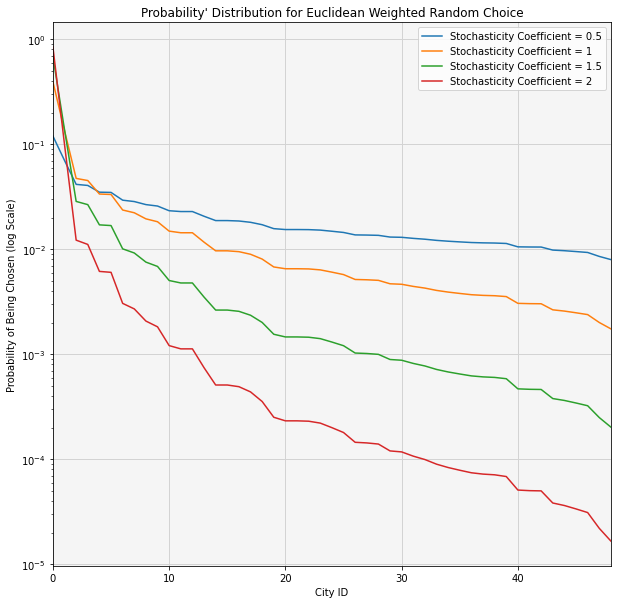

In [33]:
ax = ody.plot()
ax.set_title("Probability' Distribution for Euclidean Weighted Random Choice")
for i in [0.5, 1, 1.5, 2]:
    probability_distributions = euclidean_weighted_random_choice(bestSequenceE[1:], EI51, stochasticity_coefficient=i, print_report=True)
    ax.plot(probability_distributions, label="Stochasticity Coefficient = " + str(i))

ax.set_xlim(0, len(probability_distributions)-1)

ax.set_yscale('log')
plt.xlabel('City ID')   ;   plt.ylabel('Probability of Being Chosen (log Scale)')
plt.legend(loc='upper right')
plt.show()

## 3-opt
## Testing different initial Temperatures and Iterations.
While ending Temperature will be 0.01 (for consistency between tests)
*This will take about 2 hours per map

In [24]:
name = "EI51"   ;   map=EI51    ;   print(f"\n ----- Calculating Table for Map '{name}' -----")
T = [np.sqrt(51), 2.5, 5, 10, 20]
ITERATIONS = [10**3, 10**4, 10**5, 10**6]
# ITERATIONS = [10**3, 10**3, 10**3, 10**3]
method = '3-opt'

_ , I_mDLSE, bestSequenceSE = initSequence(map, startingCity=40, exTime=5, printStats=False)
initSSE = [I_mDLSE, bestSequenceSE]

results = np.array([[0, 0, I_mDL[-1], 0, 0]])
for t in T:
    for I in ITERATIONS:
        print(f"Calculating: T({t:.2f}) & I({I})")
        ST = time.time()
        ALPHA=np.power((0.01/t), 1/I) ;
        bestDistance, bestSequence, mD, temperaturesList = simulatedAnnealing(map, startingSity=40, print_stats=False, IS=initSSE, ITERATIONS=I, ALPHA=ALPHA, T_input=t, method=method)
        results = np.append(results, [[t, I, bestDistance, time.time()-ST, ALPHA]], axis=0)
# print(f'results = {results}')


 ----- Calculating Table for Map 'EI51' -----


100%|██████████| 100/100 [00:05<00:00, 19.95it/s]


Calculating: T(7.14) & I(1000)
Calculating: T(7.14) & I(10000)
Calculating: T(7.14) & I(100000)
Calculating: T(7.14) & I(1000000)
Calculating: T(2.50) & I(1000)
Calculating: T(2.50) & I(10000)
Calculating: T(2.50) & I(100000)
Calculating: T(2.50) & I(1000000)
Calculating: T(5.00) & I(1000)
Calculating: T(5.00) & I(10000)
Calculating: T(5.00) & I(100000)
Calculating: T(5.00) & I(1000000)
Calculating: T(10.00) & I(1000)
Calculating: T(10.00) & I(10000)
Calculating: T(10.00) & I(100000)
Calculating: T(10.00) & I(1000000)
Calculating: T(20.00) & I(1000)
Calculating: T(20.00) & I(10000)
Calculating: T(20.00) & I(100000)
Calculating: T(20.00) & I(1000000)


In [25]:
print(f"----- Results for Map '{name}' - 3-opt -----\n"
      f"Initial Solution = {I_mDL[-1]}\n"
      f"Known Solution from Internet = {SOLUTION_EI51}\n")
# print(results)
raw_results = results.tolist()
# raw_results = [[0.0, 0.0, 3058.248824559163, 0.0], [5.0, 1000.0, 3042.394592931355, 1.0756289958953857], [5.0, 10000.0, 3003.3261570857867, 9.907506942749023], [5.0, 100000.0, 2816.4923460354444, 99.40217924118042], [5.0, 1000000.0, 2707.102367558333, 982.507440328598], [10.0, 1000.0, 3040.1583864510094, 0.9896183013916016], [10.0, 10000.0, 3031.191519476093, 9.822263956069946], [10.0, 100000.0, 2890.1179563691785, 98.08808922767639], [10.0, 1000000.0, 2823.7171528421904, 988.5342738628387], [20.0, 1000.0, 3049.046930271007, 0.9914770126342773], [20.0, 10000.0, 3045.360638769992, 9.818662881851196], [20.0, 100000.0, 3049.046930271007, 98.26805925369263], [20.0, 1000000.0, 2804.3221401911496, 988.6235768795013], [40.0, 1000.0, 3049.046930271007, 0.9925529956817627], [40.0, 10000.0, 3049.046930271007, 9.947969913482666], [40.0, 100000.0, 3049.046930271007, 98.2391710281372], [40.0, 1000000.0, 2784.855472781591, 988.590784072876]]

""" Table formatted results for tabular form. """
headers = ["Iterations/T", "sqrt(51)", 2.5, 5, 10, 20, "Average Execution Time (s)"]
n_results = [headers]

for i in range(0, 4):
    n_results.append([raw_results[1 + i][1], raw_results[1 + i][2], raw_results[5 + i][2], raw_results[9 + i][2], raw_results[13 + i][2], raw_results[17 + i][2]])
    n_results[i + 1].append(np.mean([raw_results[1 + i][3], raw_results[5 + i][3], raw_results[9 + i][3], raw_results[13 + i][3], raw_results[17 + i][3]]))

print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right")) # , tablefmt='latex'
# print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right", tablefmt='latex'))
latex_caption = r"Results for map EI51. Where alpha is calculated by $alpha = \\sqrt[\leftroot{-3}\uproot{3}{iterations}]{\tfrac{1}{0.02}}$"

----- Results for Map 'EI51' - 3-opt -----
Initial Solution = 536.3515770972873
Known Solution from Internet = 426

  Iterations/T    sqrt(51)    2.5      5     10     20    Average Execution Time (s)
--------------  ----------  -----  -----  -----  -----  ----------------------------
          1000       464.2  478.3  453.1  448.3  449.9                      0.419059
         10000       449.2  452.4  435.4  444.4  443.1                        4.3171
        100000       444.0  438.0  437.8  447.8  433.7                       41.4786
       1000000       432.0  438.3  443.3  438.5  439.9                       416.406


In [28]:
name = "A280"   ;   map=A280    ;   print(f"\n ----- Calculating Table for Map '{name}' - 3-opt -----")
T = [np.sqrt(280), 2.5, 5, 10, 20]
ITERATIONS = [10**3, 10**4, 10**5, 10**6]
# ITERATIONS = [10**4, 10**4, 10**4, 10**4]
method = '3-opt'
_ , I_mDL, bestSequence = initSequence(A280, startingCity=96, exTime=10, printStats=False)
initS = [I_mDL, bestSequence]

results = np.array([[0, 0, I_mDL[-1], 0, 0]])
for t in T:
    for I in ITERATIONS:
        ST = time.time()
        ALPHA=np.power((0.01/t), 1/I) ; print(f" Initial Alpha for T({t}) = {ALPHA}")
        bestDistance, bestSequence, mD, temperaturesList = \
            simulatedAnnealing(map, startingSity=96, print_stats=False, IS=initS, ITERATIONS=I, ALPHA=ALPHA, T_input=t, method=method)
        results = np.append(results, [[t, I, bestDistance, time.time()-ST, ALPHA]], axis=0)
# print(f'results = {results}')


 ----- Calculating Table for Map 'A280' - 3-opt -----


100%|██████████| 100/100 [00:10<00:00,  9.97it/s]


 Initial Alpha for T(16.73320053068151) = 0.9926049142171636
 Initial Alpha for T(16.73320053068151) = 0.9992580189054533
 Initial Alpha for T(16.73320053068151) = 0.9999257771047797
 Initial Alpha for T(16.73320053068151) = 0.9999925774625595
 Initial Alpha for T(2.5) = 0.9944937543311236
 Initial Alpha for T(2.5) = 0.9994480063128159
 Initial Alpha for T(2.5) = 0.9999447869151199
 Initial Alpha for T(2.5) = 0.9999944785543253
 Initial Alpha for T(5) = 0.9938046626377964
 Initial Alpha for T(5) = 0.9993787322569303
 Initial Alpha for T(5) = 0.9999378558500435
 Initial Alpha for T(5) = 0.9999937854112122
 Initial Alpha for T(10) = 0.9931160484209338
 Initial Alpha for T(10) = 0.9993094630025899
 Initial Alpha for T(10) = 0.9999309248330094
 Initial Alpha for T(10) = 0.9999930922685795
 Initial Alpha for T(20) = 0.9924279113496888
 Initial Alpha for T(20) = 0.999240198549462
 Initial Alpha for T(20) = 0.9999239938640173
 Initial Alpha for T(20) = 0.9999923991264272


In [29]:
# print(results)
print(f"----- Results for Map '{name}' - 3-opt -----\n"
      f"Initial Solution = {I_mDL[-1]}\n"
      f"Known Solution from Internet = {SOLUTION_A280}\n")
# print(results)
raw_results = results
# raw_results = [[0.0, 0.0, 3058.248824559163, 0.0], [5.0, 1000.0, 3042.394592931355, 1.0756289958953857], [5.0, 10000.0, 3003.3261570857867, 9.907506942749023], [5.0, 100000.0, 2816.4923460354444, 99.40217924118042], [5.0, 1000000.0, 2707.102367558333, 982.507440328598], [10.0, 1000.0, 3040.1583864510094, 0.9896183013916016], [10.0, 10000.0, 3031.191519476093, 9.822263956069946], [10.0, 100000.0, 2890.1179563691785, 98.08808922767639], [10.0, 1000000.0, 2823.7171528421904, 988.5342738628387], [20.0, 1000.0, 3049.046930271007, 0.9914770126342773], [20.0, 10000.0, 3045.360638769992, 9.818662881851196], [20.0, 100000.0, 3049.046930271007, 98.26805925369263], [20.0, 1000000.0, 2804.3221401911496, 988.6235768795013], [40.0, 1000.0, 3049.046930271007, 0.9925529956817627], [40.0, 10000.0, 3049.046930271007, 9.947969913482666], [40.0, 100000.0, 3049.046930271007, 98.2391710281372], [40.0, 1000000.0, 2784.855472781591, 988.590784072876]]

""" Table formatted results for tabular form. """
headers = ["Iterations/T", "sqrt(280)", 2.5, 5, 10, 20, "Average Execution Time (s)"]
n_results = [headers]

for i in range(0, 4):
    n_results.append([raw_results[1 + i][1], raw_results[1 + i][2], raw_results[5 + i][2], raw_results[9 + i][2], raw_results[13 + i][2], raw_results[17 + i][2]])
    n_results[i + 1].append(np.mean([raw_results[1 + i][3], raw_results[5 + i][3], raw_results[9 + i][3], raw_results[13 + i][3], raw_results[17 + i][3]]))

print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right")) # , tablefmt='latex'
# print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right", tablefmt='latex'))
latex_caption = r"Results for map A280. Where alpha is calculated by $alpha = \\sqrt[\leftroot{-3}\uproot{3}{iterations}]{\tfrac{1}{0.02}}$"


----- Results for Map 'A280' - 3-opt -----
Initial Solution = 3029.808757028466
Known Solution from Internet = 2579

  Iterations/T    sqrt(280)     2.5       5      10      20    Average Execution Time (s)
--------------  -----------  ------  ------  ------  ------  ----------------------------
          1000       3001.3  3001.9  2976.0  2996.7  3017.7                       1.35198
         10000       2838.1  2839.8  2899.5  2858.4  2898.2                       12.6184
        100000       2815.9  2791.9  2801.4  2768.0  2794.9                       123.442
       1000000       2791.9  2739.6  2745.8  2755.5  2765.2                       1232.98


In [ ]:
name = "PCB442"   ;   map=PCB442    ;   print(f"\n ----- Calculating Table for Map '{name}' - 3-opt -----")
T = [np.sqrt(444), 2.5, 5, 10, 20]
ITERATIONS = [10**3, 10**4, 10**5, 10**6]
# ITERATIONS = [10**4, 10**4, 10**4, 10**4]
method = '3-opt'

_ , I_mDLSE, bestSequenceSE = initSequence(PCB442, startingCity=442, exTime=15, printStats=False)
initSSE = [I_mDLSE, bestSequenceSE]

results = np.array([[0, 0, I_mDL[-1], 0, 0]])
for t in T:
    for I in ITERATIONS:
        print(f"Calculating: T({t:.2f}) & I({I})")
        ST = time.time()
        ALPHA=np.power((0.01/t), 1/I) ;
        bestDistance, bestSequence, mD, temperaturesList = simulatedAnnealing(map, startingSity=442, print_stats=False, IS=initSSE, ITERATIONS=I, ALPHA=ALPHA, T_input=t, method=method)
        results = np.append(results, [[t, I, bestDistance, time.time()-ST, ALPHA]], axis=0)
# print(f'results = {results}')


 ----- Calculating Table for Map 'PCB442' - 3-opt -----


 90%|█████████ | 90/100 [00:15<00:01,  6.00it/s]


Calculating: T(21.07) & I(1000)
Calculating: T(21.07) & I(10000)
Calculating: T(21.07) & I(100000)
Calculating: T(21.07) & I(1000000)
Calculating: T(2.50) & I(1000)
Calculating: T(2.50) & I(10000)
Calculating: T(2.50) & I(100000)
Calculating: T(2.50) & I(1000000)
Calculating: T(5.00) & I(1000)
Calculating: T(5.00) & I(10000)
Calculating: T(5.00) & I(100000)
Calculating: T(5.00) & I(1000000)
Calculating: T(10.00) & I(1000)
Calculating: T(10.00) & I(10000)
Calculating: T(10.00) & I(100000)
Calculating: T(10.00) & I(1000000)


In [ ]:
print(f"----- Results for Map '{name}' - 3-opt -----\n"
      f"Initial Solution = {I_mDLSE[-1]}\n"
      f"Known Solution from Internet = {SOLUTION_PCB442}\n")
# print(results)
raw_results = results
# raw_results = [[0.0, 0.0, 3058.248824559163, 0.0], [5.0, 1000.0, 3042.394592931355, 1.0756289958953857], [5.0, 10000.0, 3003.3261570857867, 9.907506942749023], [5.0, 100000.0, 2816.4923460354444, 99.40217924118042], [5.0, 1000000.0, 2707.102367558333, 982.507440328598], [10.0, 1000.0, 3040.1583864510094, 0.9896183013916016], [10.0, 10000.0, 3031.191519476093, 9.822263956069946], [10.0, 100000.0, 2890.1179563691785, 98.08808922767639], [10.0, 1000000.0, 2823.7171528421904, 988.5342738628387], [20.0, 1000.0, 3049.046930271007, 0.9914770126342773], [20.0, 10000.0, 3045.360638769992, 9.818662881851196], [20.0, 100000.0, 3049.046930271007, 98.26805925369263], [20.0, 1000000.0, 2804.3221401911496, 988.6235768795013], [40.0, 1000.0, 3049.046930271007, 0.9925529956817627], [40.0, 10000.0, 3049.046930271007, 9.947969913482666], [40.0, 100000.0, 3049.046930271007, 98.2391710281372], [40.0, 1000000.0, 2784.855472781591, 988.590784072876]]

""" Table formatted results for tabular form. """
headers = ["Iterations/T", "sqrt(442)", 2.5, 5, 10, 20, "Average Execution Time (s)"]
n_results = [headers]

for i in range(0, 4):
    n_results.append([raw_results[1 + i][1], raw_results[1 + i][2], raw_results[5 + i][2], raw_results[9 + i][2], raw_results[13 + i][2], raw_results[17 + i][2]])
    n_results[i + 1].append(np.mean([raw_results[1 + i][3], raw_results[5 + i][3], raw_results[9 + i][3], raw_results[13 + i][3], raw_results[17 + i][3]]))

print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".1f", ".1f"], numalign="right")) # , tablefmt='latex'
latex_caption = r"Results for map PCB442. Where alpha is calculated by $alpha = \\sqrt[\leftroot{-3}\uproot{3}{iterations}]{\tfrac{1}{0.02}}$"

## Different permutation algorithms, inside the simulated Annealing

### Euclidean Weighted Random Choice
Probability' Distribution that a city is going to be selected based on its distance from the current.

In [ ]:
ax = ody.plot()
ax.set_title("Probability' Distribution for Euclidean Weighted Random Choice")
for i in [0.5, 1, 1.5, 2]:
    probability_distributions = euclidean_weighted_random_choice(bestSequenceE[1:], EI51, stochasticity_coefficient=i, print_report=True)
    ax.plot(probability_distributions, label="Stochasticity Coefficient = " + str(i))

ax.set_xlim(0, len(probability_distributions)-1)

ax.set_yscale('log')
plt.xlabel('City ID')   ;   plt.ylabel('Probability of Being Chosen (log Scale)')
plt.legend(loc='upper right')
plt.show()

### Example Plot of the EWRC that fails to find good paths.

In [ ]:
bestDistanceEWRCT, bestSequenceEWRCT, mDEWRCT, temperaturesListEWRCT = simulatedAnnealing(EI51, startingSity=40, print_stats=True, ITERATIONS=10**4, method='ewrc')


print(f"\n ------ Result: Best distance = {bestDistanceEWRCT}")
plot_journey(EI51, bestSequenceEWRCT, 'test')

## Comparing EWRC, 2-opt, 3-opt - on A280

In [ ]:
""" !!Necessary Since A280 has 2 cities with the same coordinates!! """
def remove_duplicates(map):
    ol = map.tolist()
    nl = [ol[0]]
    ol.remove(nl[0])
    for o in ol:
        f = False
        for n in nl:
            # print(n[0])
            if o[0] == n[0] and o[1] == n[1]:
                f = True
                print(f"Bad MF = {o}")
        if not f: nl.append(o)
    return np.array(nl)

In [56]:
name = "A280"   ;   map=remove_duplicates(A280)    ;   print(f"\n ----- Comparing EWRC, 2-opt, 3-opt  for Map '{name}' -----")
METHODS = ['ewrc', "2-opt", "3-opt"]
ITERATIONS = [10**3, 10**3, 10**3]
ITERATIONS = [10**3, 10**4, 10**5]
t = 5

_ , I_mDLTT, bestSequenceTT = initSequence(np.array(map, copy=True), startingCity=40, exTime=1, printStats=False)
bestSequenceTT = np.delete(bestSequenceTT, np.argwhere(bestSequenceTT == 172))
initSTT = [I_mDLTT, bestSequenceTT]

results = [[0, 0, I_mDLTT[-1], 0]]
for m in METHODS:
    for I in ITERATIONS:
        ST = time.time()
        ALPHA_T=np.power((0.01/t), 1/I) ; print(f"Method {m} : Iterations = {I}")
        bestDistanceTTT, bestSequenceTTT, mDTTT, temperaturesListTTT = \
            simulatedAnnealing(np.array(map, copy=True), startingSity=96, print_stats=False, IS=copy.deepcopy(initSTT), ITERATIONS=I, ALPHA=ALPHA_T, T_input=t, method=m)
        results.append([m, I, bestDistanceTTT, time.time()-ST])
print(f'results = {results}')

Bad MF = [80, 25, 172]

 ----- Comparing EWRC, 2-opt, 3-opt  for Map 'A280' -----


100%|██████████| 100/100 [00:01<00:00, 95.91it/s]


In [42]:
print(f"----- Results for Comparing EWRC, 2-opt, 3-opt -----\n"
      f"Initial Solution = {I_mDLTT[-1]}\n"
      f"Known Solution from Internet = {SOLUTION_A280}\n")
# print(results)
raw_results = results
# raw_results = [[0.0, 0.0, 3058.248824559163, 0.0], [5.0, 1000.0, 3042.394592931355, 1.0756289958953857], [5.0, 10000.0, 3003.3261570857867, 9.907506942749023], [5.0, 100000.0, 2816.4923460354444, 99.40217924118042], [5.0, 1000000.0, 2707.102367558333, 982.507440328598], [10.0, 1000.0, 3040.1583864510094, 0.9896183013916016], [10.0, 10000.0, 3031.191519476093, 9.822263956069946], [10.0, 100000.0, 2890.1179563691785, 98.08808922767639], [10.0, 1000000.0, 2823.7171528421904, 988.5342738628387], [20.0, 1000.0, 3049.046930271007, 0.9914770126342773], [20.0, 10000.0, 3045.360638769992, 9.818662881851196], [20.0, 100000.0, 3049.046930271007, 98.26805925369263], [20.0, 1000000.0, 2804.3221401911496, 988.6235768795013], [40.0, 1000.0, 3049.046930271007, 0.9925529956817627], [40.0, 10000.0, 3049.046930271007, 9.947969913482666], [40.0, 100000.0, 3049.046930271007, 98.2391710281372], [40.0, 1000000.0, 2784.855472781591, 988.590784072876]]

""" Table formatted results for tabular form. """
headers = ["Iterations/Method","ewrc", "2-opt", "3-opt", "Average Execution Time (s)"]
n_results = [headers]

for i in range(0, 3):
    n_results.append([raw_results[1 + i][1], raw_results[1 + i][2], raw_results[4 + i][2], raw_results[7 + i][2]])
    n_results[i + 1].append(np.mean([raw_results[1 + i][3], raw_results[4 + i][3], raw_results[7 + i][3]]))
n_results.append(['Execution Time Sum', np.sum([raw_results[i][3] for i in range(1,4)]), np.sum([raw_results[i][3] for i in range(4,7)]), np.sum([raw_results[i][3] for i in range(7,10)])])

print(tabulate(n_results[1:], headers=n_results[0], floatfmt=[".0f", ".1f", ".1f", ".1f", ".2f"], numalign="right"))


----- Results for Comparing EWRC, 2-opt, 3-opt -----
Initial Solution = 2959.3275733566334
Known Solution from Internet = 2579

Iterations/Method       ewrc    2-opt    3-opt    Average Execution Time (s)
-------------------  -------  -------  -------  ----------------------------
1000                  2954.2   2934.7   2928.1                         50.08
10000                 2930.2   2834.7   2864.0                        495.94
100000                2900.6   2713.8   2765.6                       4968.74
Execution Time Sum   16293.8    110.4    140.1


In [107]:
t = 5
I = 10**6
ALPHA_T=np.power((0.01/t), 1/I)

st = time.perf_counter()
bestDistanceTTT3, bestSequenceTTT3, mDTTT3, temperaturesListTTT3 = \
        simulatedAnnealing(np.array(map, copy=True), startingSity=96, print_stats=False, IS=copy.deepcopy(initSTT), ITERATIONS=I, ALPHA=ALPHA_T, T_input=t, method='3-opt')
print(f' 3-opt Best distance with 10^6 Iterations = {bestDistanceTTT3:.2f}')
print(f'\n with elapsed Time = {time.perf_counter() - st:.2f}')

st = time.perf_counter()
bestDistanceTTT2, bestSequenceTTT2, mDTTT2, temperaturesListTTT2 = \
        simulatedAnnealing(np.array(map, copy=True), startingSity=96, print_stats=False, IS=copy.deepcopy(initSTT), ITERATIONS=I, ALPHA=ALPHA_T, T_input=t, method='2-opt')
print(f' 2-opt Best distance with 10^6 Iterations = {bestDistanceTTT2:.2f}')
print(f'\n with elapsed Time = {time.perf_counter() - st:.2f}')



 3-opt Best distance with 10^6 Iterations = 2787.5596530398802

 with elapsed Time = 1255.4038
 2-opt Best distance with 10^6 Iterations = 2636.717309596377


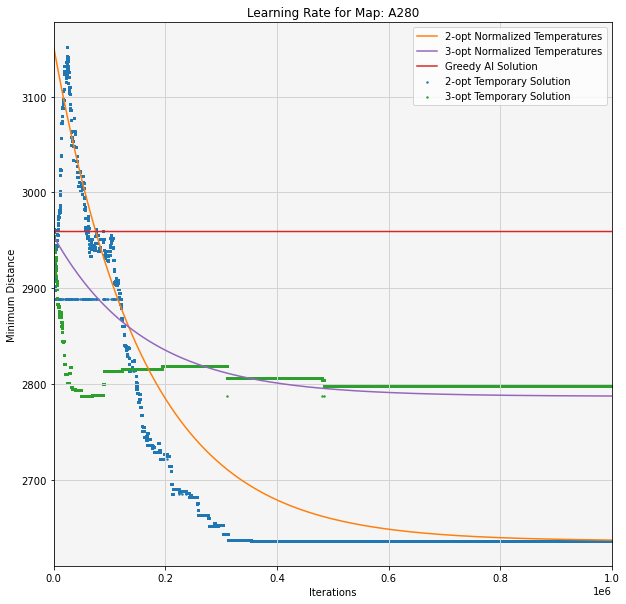

In [108]:
""" Testing Simulated Annealing - 2-opt vs 3-opt """
name = "A280"

ax = ody.plot()
ax.set_title("Learning Rate for Map: " + name + "3opt vs 2opt")
"""2-opt"""
ax.scatter([_ for _ in range(mDTTT2.shape[0])], mDTTT2, label="2-opt Temporary Solution", s=2, color='tab:blue')
ax.plot([_ for _ in range(mDTTT2.shape[0])], temperaturesListTTT2, label="2-opt Normalized Temperatures", color='tab:orange')
"""3-opt"""
ax.scatter([_ for _ in range(mDTTT3.shape[0])], mDTTT3, label="3-opt Temporary Solution", s=2, color='tab:green')
ax.plot([_ for _ in range(mDTTT3.shape[0])], temperaturesListTTT3, label="3-opt Normalized Temperatures", color='tab:purple')
"""Greedy AI"""
ax.plot([_ for _ in range(mDTTT2.shape[0])], [I_mDLTT[-1] for _ in range(mDTTT2.shape[0])], label="Greedy AI Solution", color='tab:red')


ax.set_xlim(0, mDTTT2.shape[0])
plt.xlabel('Iterations')   ;   plt.ylabel('Minimum Distance')
plt.legend(loc='upper right')
plt.show()

In [38]:
print(f"Total Experiment Execution Time = {(time.time() - EXPERIMENT_STARTING_TIME)/60:.2f} Minutes")



Total Experiment Execution Time = 533.10 Minutes
